<a href="https://www.kaggle.com/code/ositaudechukwu/predicting-house-prices-advanced-regression?scriptVersionId=129626440" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
Aim - Predict house price for residential homes in Ames, Iowa using 79 explanatory variables describing (almost) every aspect of residential homes.

I will assess, explore, clean, and preprocess the train dataset; then fit, train, and test 9 regression models on it.

* [Import Packages and Datasets](#section-one)
* [Assess the Train Dataset](#section-two)
    - [Overview of the Dataset](#section-two-subsection-one)
    - [Check for Duplicates and Nulls](#section-two-subsection-two)
* [Data Cleaning](#section-three)
* [Exploratory Data Analysis](#section-four)
* [Data Preprocessing](#section-five)
    - [Numerically Encoding Categorical Features](#section-five-subsection-two)
    - [Imputation - Mean vs Median vs MICE](#section-five-subsection-three)
* [Feature Selection](#section-six)
* [Regression Model Training and Testing](#section-seven)

<a id="section-one"></a>
# 1. Import Packages and Datasets

1. Import Python packages
2. Read in the data description file
3. Read in the train dataset

<a id="section-one-subsection-one"></a>
### Import Python packages

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # mathematical operations and array manipulation
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation
import seaborn as sb # data visualisation
import plotly.express as px # interactive visualisation
import plotly.graph_objects as go
import missingno as msno  # visualise missingness


import scipy.stats as stats # statistical tests

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) 
## that gets preserved as output when you create a version using "Save & Run All" 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# Set the display.max_columns option to None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id="section-one-subsection-two"></a>
### Read the data description text file

In [3]:
# Read the contents of the data_description.txt
with open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt', 'r') as file:
    contents = file.read()

In [4]:
print(contents)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

<a id="section-one-subsection-three"></a>
### Import the Train Dataset

In [5]:
# Import the train data set
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

<a id="section-two"></a>
# 2. Assess the Dataset

<a id="section-two-subsection-one"></a>
### 2.1 Get an overview of the dataset

In [6]:
# How many (rows, columns) are in the dataset
print(f"The train dataset has {train_data.shape[0]} rows and {train_data.shape[1]} columns.")

The train dataset has 1460 rows and 81 columns.


In [7]:
# Examine five random rows of train dataset
train_data.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
650    651          60       FV         65.0     8125   Pave   NaN      Reg   
502    503          20       RL         70.0     9170   Pave   NaN      Reg   
79      80          50       RM         60.0    10440   Pave  Grvl      Reg   
1145  1146          50       RM         52.0     6240   Pave   NaN      Reg   
211    212          20       RL         83.0    10420   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
650          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
502          Lvl    AllPub    Corner       Gtl      Edwards      Feedr   
79           Lvl    AllPub    Corner       Gtl      OldTown       Norm   
1145         Lvl    AllPub    Inside       Gtl      BrkSide       Norm   
211          Lvl    AllPub    Corner       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
650        Norm     1Fam     2Story            7            6       2007   
502        Norm     1Fam     1Story            5            7       1965   
79         Norm     1Fam     2Story            5            6       1910   
1145       Norm     1Fam     1.5Fin            5            6       1928   
211        Norm     1Fam     1Story            6            5       2009   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
650           2007     Gable  CompShg     CemntBd     CmentBd        NaN   
502           1965       Hip  CompShg     MetalSd     MetalSd       None   
79            1981     Gable  CompShg     Wd Sdng     Wd Sdng       None   
1145          1950     Gable  CompShg     MetalSd     MetalSd       None   
211           2009     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
650          NaN        Gd        TA      PConc       Gd       TA   
502          0.0        TA        TA     CBlock       TA       TA   
79           0.0        TA        TA      PConc       TA       TA   
1145         0.0        TA        TA     BrkTil       TA       TA   
211          0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
650            No          Unf           0          Unf           0   
502            No          ALQ         698          GLQ          96   
79             No          Unf           0          Unf           0   
1145           No          Unf           0          Unf           0   
211            Mn          GLQ          36          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
650         813          813    GasA        Ex          Y      SBrkr   
502         420         1214    GasA        Ex          Y      SBrkr   
79          440          440    GasA        Gd          Y      SBrkr   
1145       1042         1042    GasA        Ex          Y      SBrkr   
211        1176         1212    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
650        822       843             0       1665             0             0   
502       1214         0             0       1214             1             0   
79         682       548             0       1230             0             0   
1145      1042       534             0       1576             0             0   
211       1212         0             0       1212             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
650          2         1             3             1          Gd   
502          1         0             2             1          TA   
79           1         1             2             1          TA   
1145         1         0             3             1          TA   
211          2         0             3             1          Gd   

   

In [8]:
# Get an overview of the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are 38 numerical and 43 categorical features. Some features have nulls (poolQC only has 7 non-null rows out of 1460!). 

In [9]:
# Run summary statistics on mumerical features
train_data.describe(include=np.number)

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

Considering their 75% and max values, some features likely have outliers (e.g. `LotArea`; `MasVnrArea`; `MiscVal`; and our target variable, `SalePrice`). 

In [10]:
# Run summary statistics on categorical features
train_data.describe(include='object')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

The following columns piqued my interest because their min, 25%, 50%, and 75% values are 0:

- `BsmtFinSF2`
- `LowQualFinSF`
- `BsmtHalfBath`
- `WoodDeckSF`
-`OpenPorchSF`
- `EnclosedPorch`
- `3SsnPorch`
- `ScreenPorch`
- `PoolArea`
- `MiscVal`

Perhaps because most houses lack pools, basements, porches?

<a id="section-two-subsection-two"></a>
### 2.2. Check for duplicates, nulls

In [11]:
# Are there duplicates?
train_data.duplicated().sum()

0

In [12]:
# Function to calculate missingess
def calculate_missingness(df, normalize=False):
    '''
    Finds nulls per column in a DataFrame. 
    Returns the null report and a list of columns with nulls
    '''
    if normalize:
        null_report = df.isnull().mean() * 100
    
    else:
        null_report = df.isnull().sum()
    
    features_with_missingness = null_report[null_report > 0].sort_values(ascending=False)
    
    return null_report, features_with_missingness

In [13]:
# Are there nulls in the dataset?
null_percentages, features_with_missingness = calculate_missingness(train_data, normalize=True)

features_with_missingness

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

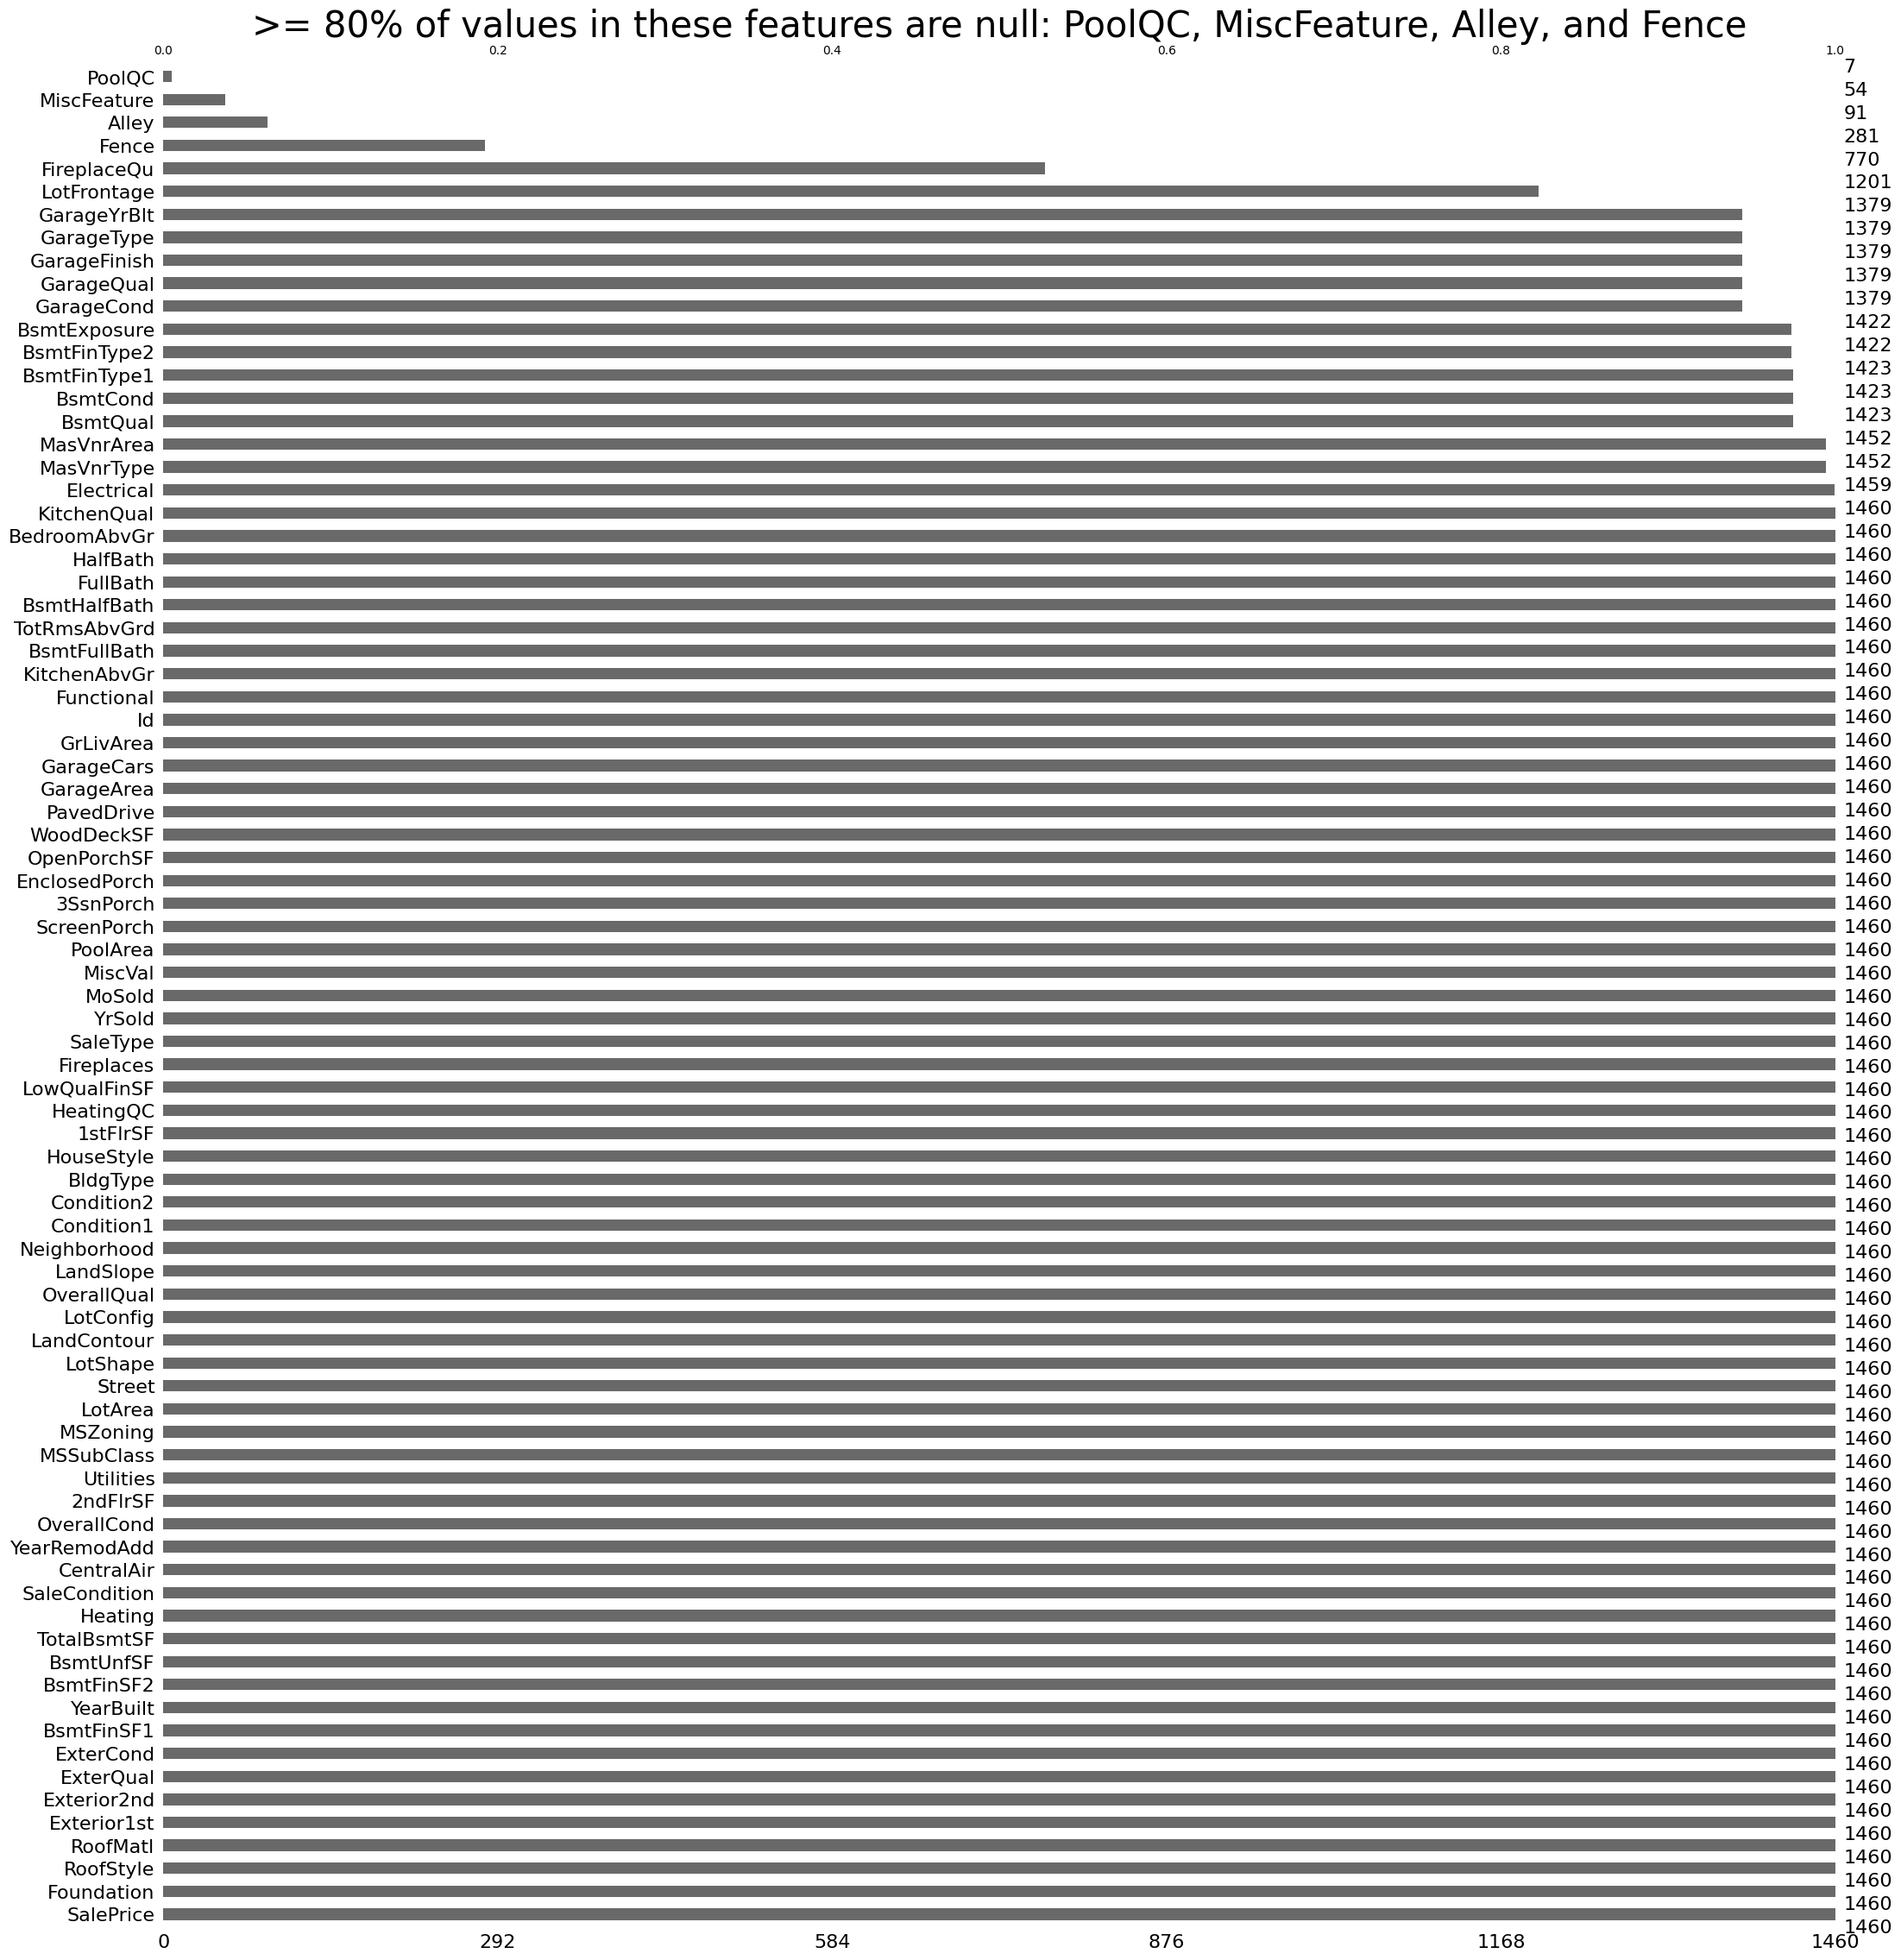

In [14]:
# Which columns have missing values?
msno.bar(train_data, sort='descending')
plt.title('>= 80% of values in these features are null: PoolQC, MiscFeature, Alley, and Fence',fontsize=30)
plt.show()

<AxesSubplot: >

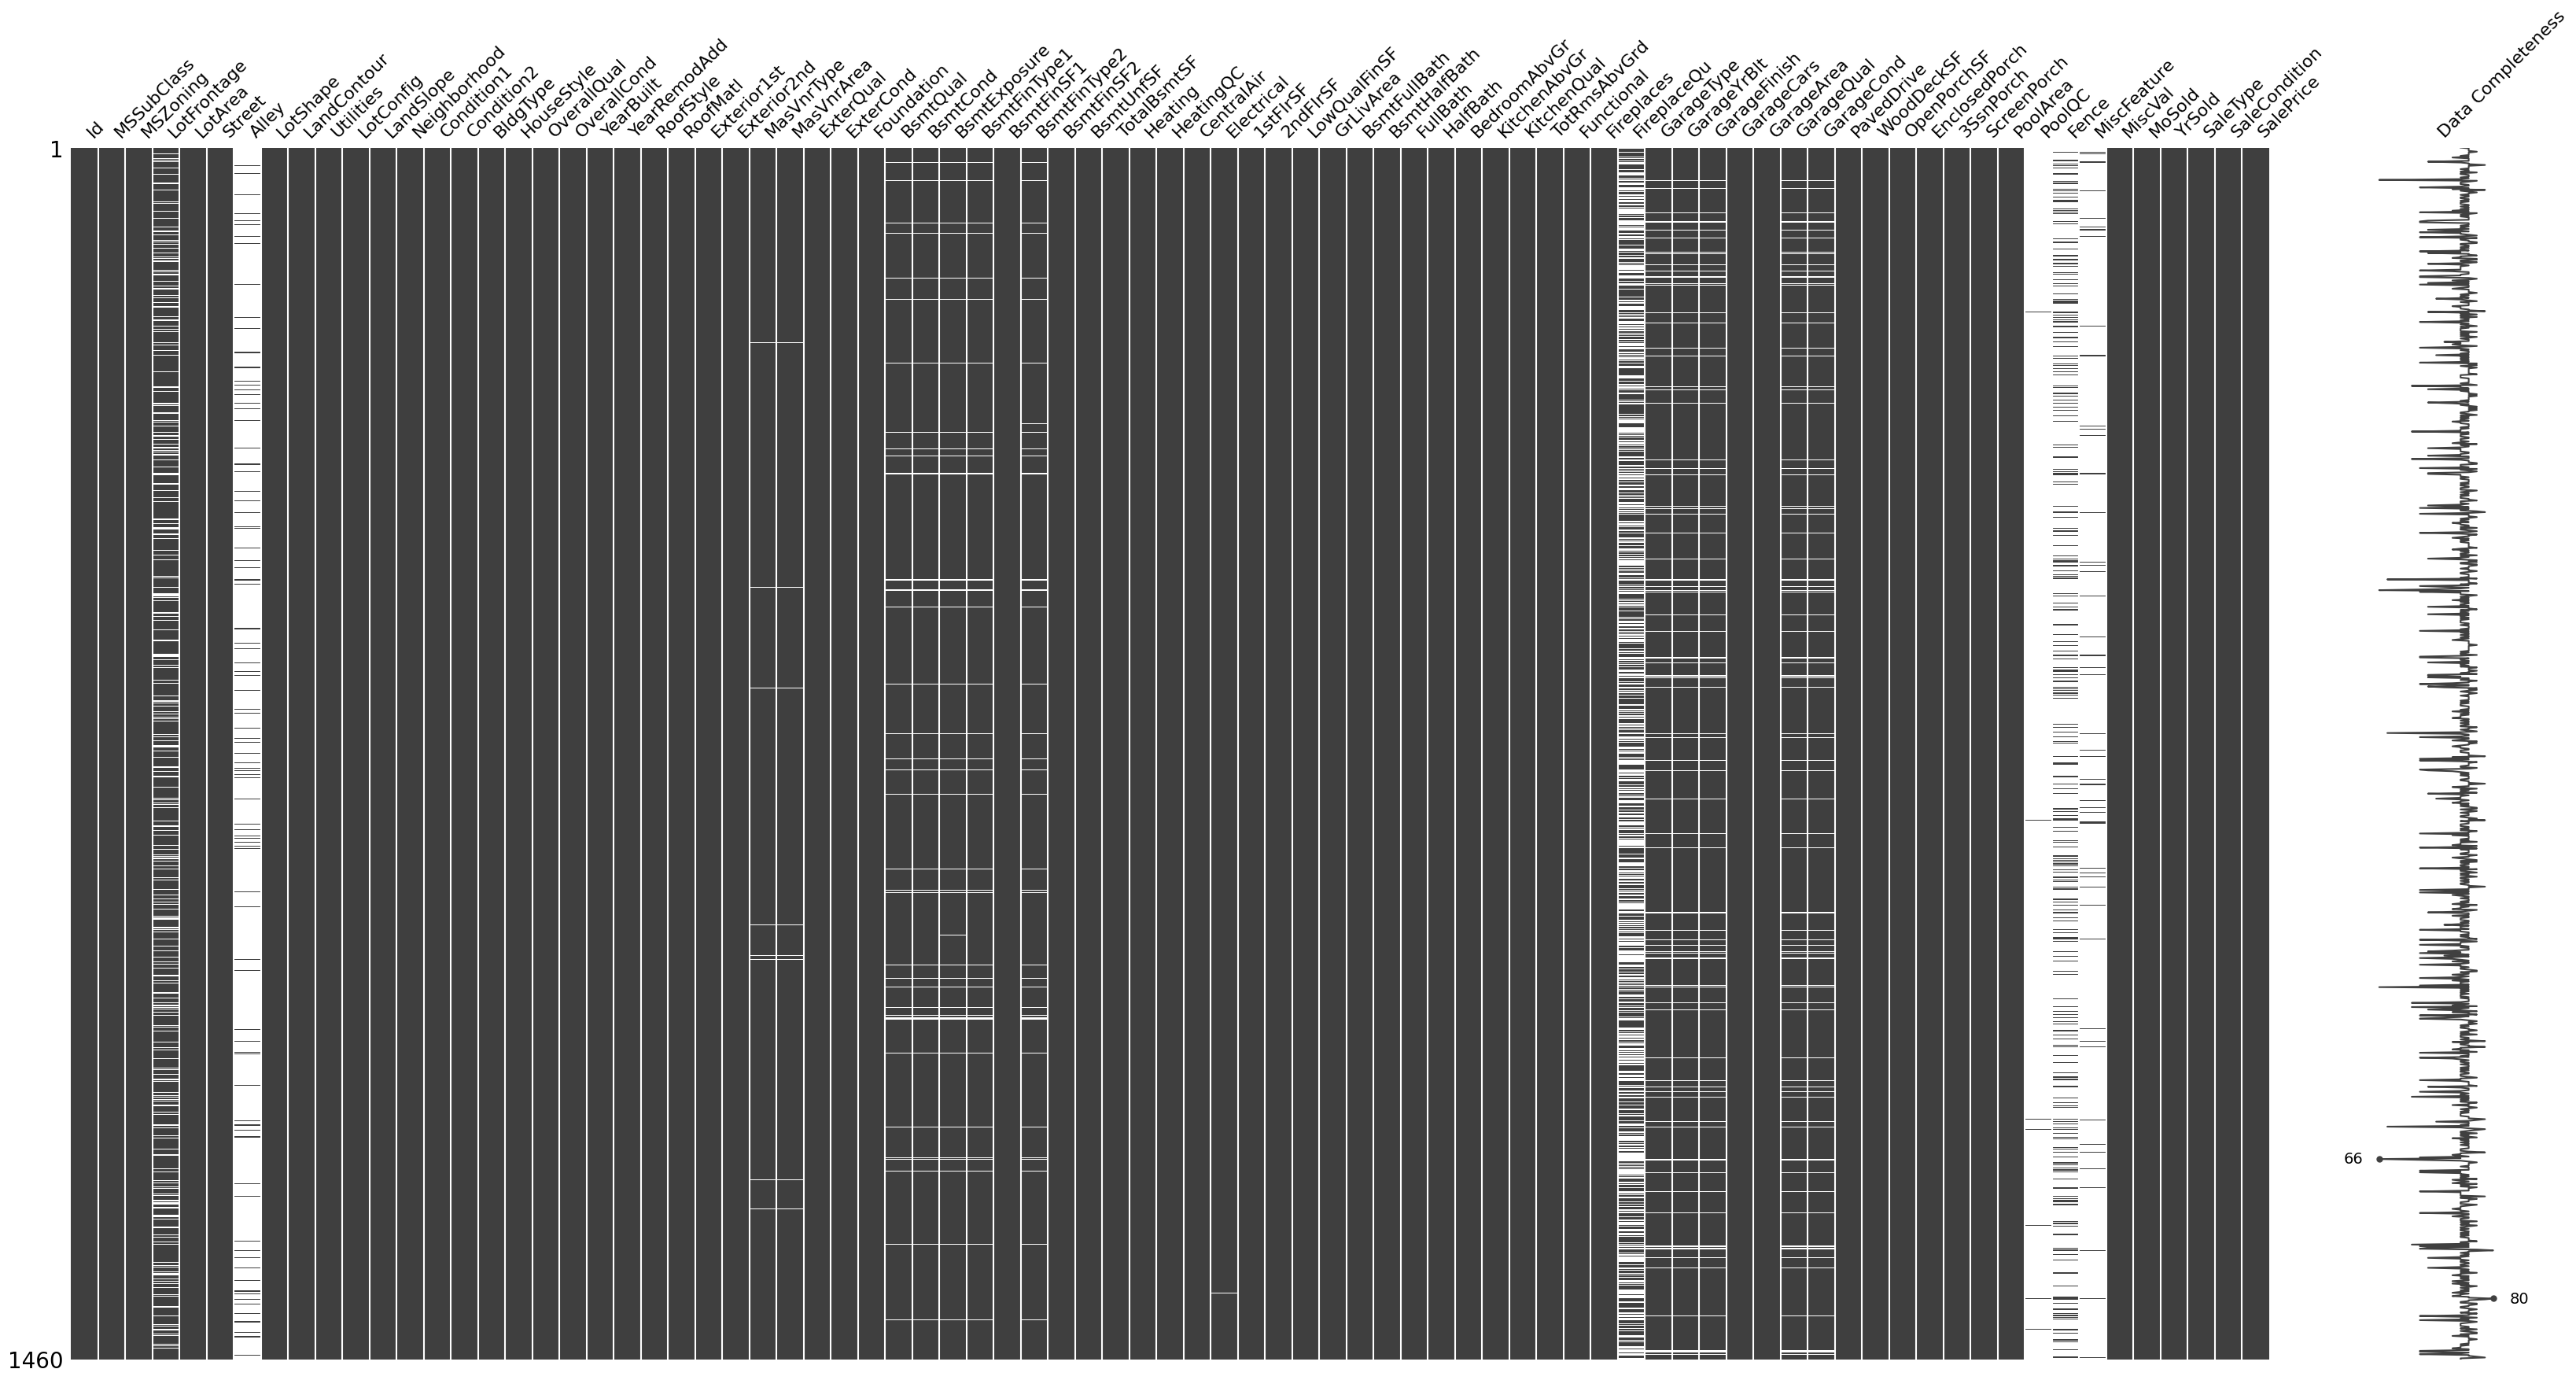

In [15]:
# Let's visualise the nulls in our dataset
msno.matrix(train_data, labels=True, figsize=(40,20))

# Absent data is shaded white, by default.

**Observations**:
- `PoolQc`, `MiscFeature`, `Alley`, and `Fence` have >= 80% of values missing. 

- `FireplaceQu` has 47% missingness.

- `LotFrontage` has 17.8% missingness.

- The following features have ~ 5% missingness: `GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageQual`, `GarageCond`

- The following features have < 3% missingness: `MasVnrType`, `MasVnrArea`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `Electrical`

- Of all features with missingness, LotFrontage and MasVnrArea are float type features. The rest are object type.

In [16]:
# Check value counts for categorical features with missingness
for feature in features_with_missingness.index:
    if train_data[feature].dtype == 'object':
        print(f"{feature}\n{train_data[feature].value_counts(dropna=False, normalize=True)}\n") #Print value counts including na
    else:
        pass

PoolQC
NaN    0.995205
Gd     0.002055
Ex     0.001370
Fa     0.001370
Name: PoolQC, dtype: float64

MiscFeature
NaN     0.963014
Shed    0.033562
Gar2    0.001370
Othr    0.001370
TenC    0.000685
Name: MiscFeature, dtype: float64

Alley
NaN     0.937671
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64

Fence
NaN      0.807534
MnPrv    0.107534
GdPrv    0.040411
GdWo     0.036986
MnWw     0.007534
Name: Fence, dtype: float64

FireplaceQu
NaN    0.472603
Gd     0.260274
TA     0.214384
Fa     0.022603
Ex     0.016438
Po     0.013699
Name: FireplaceQu, dtype: float64

GarageType
Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
NaN        0.055479
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: GarageType, dtype: float64

GarageFinish
Unf    0.414384
RFn    0.289041
Fin    0.241096
NaN    0.055479
Name: GarageFinish, dtype: float64

GarageQual
TA     0.897945
NaN    0.055479
Fa     0.032877
Gd     0.009589
Ex     0.002055
Po     0.002055
Name: Ga

- Are the values missing or, for example, do at least 80% of houses in our dataset lack a pool, alley access, a fence, and MiscFeatures?

- Considering the description in the content file, I suspect the missingness is not at random, but rather systematically related to the presence or absence of whatever is being evaluated in the house.

#### 2.2.1 Let's examine this missingness. Is the data missing completely at random?

<AxesSubplot: >

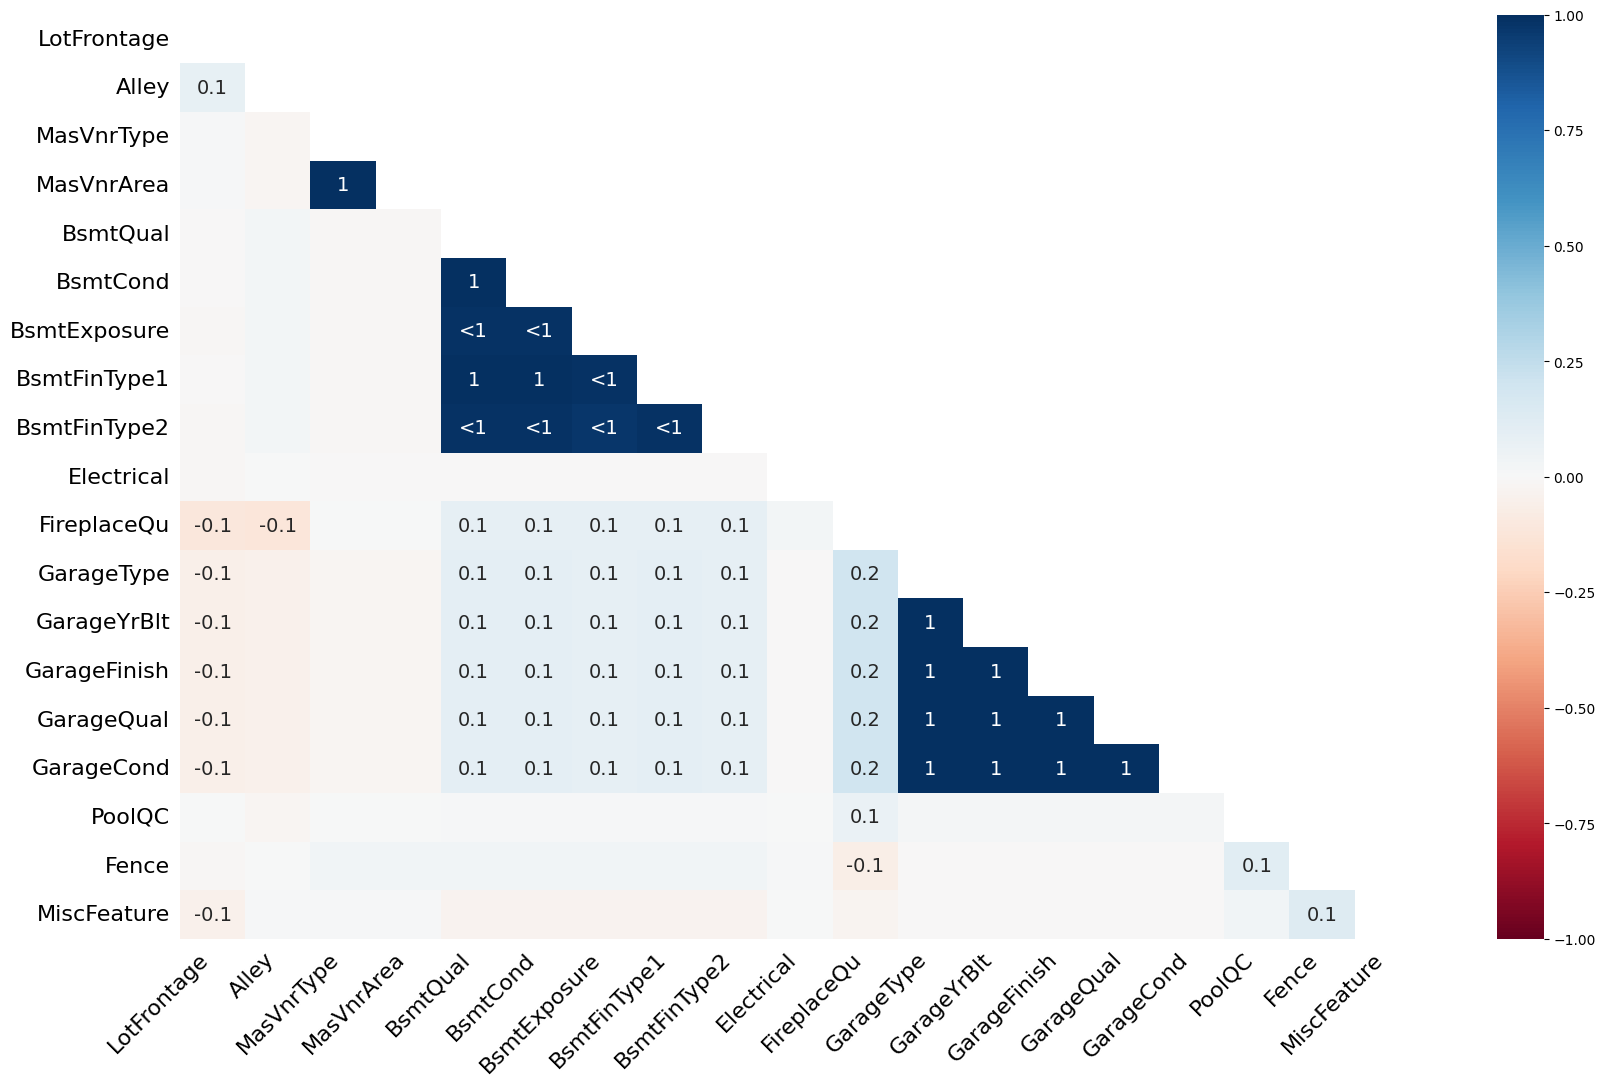

In [17]:
# Let's visualise the correlation between the missingness in different columns
msno.heatmap(train_data)

The missing values in the Bsmt columns are perfectly correlated with each other, as are the missing values in Garage columns. 

#### Confirm that missingness is not at random (i.e. systematic)

In [18]:
# Create a DataFrame to contain missingness indicator data for each variable with missingness
missing_data = pd.DataFrame()

In [19]:
# Add missingness data of features_with_missingness to missing_data DataFrame
for feature in features_with_missingness.index:
    x = feature + '_missing'
    missing_data[x] = train_data[feature].isnull().astype(int)

In [20]:
missingness_df = pd.concat([train_data, missing_data], axis=1)
missingness_df.shape

(1460, 100)

In [21]:
# Calculate the correlation matrix
corr_matrix = missingness_df.corr()

# Create a Figure object and add a Heatmap trace
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,  # Set the correlation matrix values as the data for the Heatmap
    x=list(corr_matrix.columns),  # Specify the column labels for the x-axis
    y=list(corr_matrix.index),  # Specify the row labels for the y-axis
    colorscale='tropic'  # Set the color scale for the heatmap
))

# Customize the layout of the figure
fig.update_layout(
    title='Correlation between Missingness and Other Variables',  # Set the title of the plot
    xaxis=dict(title='Variables'),  # Set the label for the x-axis
    yaxis=dict(title='Variables'),  # Set the label for the y-axis
    height=1400,  # Adjust the height of the heatmap
    width=1400  # Adjust the width of the heatmap
)

# Display the figure
fig.show()

Observing the correlation matrix, we can see that all missingness indicators except `LotFrontage_missing` and `Electrical_missing` have moderate to strong correlations with other features.

This further suggests that these features aren't missing at random.

#### Assess PoolQC missingness
- It should correspond with houses where PoolArea is 0

In [22]:
pd.crosstab(missing_data['PoolQC_missing'], train_data['PoolArea'])

PoolArea         0    480  512  519  555  576  648  738
PoolQC_missing                                         
0                  0    1    1    1    1    1    1    1
1               1453    0    0    0    0    0    0    0

PoolQC missingness corresponds with houses where PoolArea is 0.

#### Assess MiscFeature missingness
All NaNs in MiscFeatures should correspond with observations where MiscValue is 0

In [23]:
pd.crosstab(missing_data['MiscFeature_missing'], train_data['MiscVal'])

MiscVal              0      54     350    400    450    480    500    560    \
MiscFeature_missing                                                           
0                        2      1      1     11      4      2      8      1   
1                     1406      0      0      0      0      0      0      0   

MiscVal              600    620    700    800    1150   1200   1300   1400   \
MiscFeature_missing                                                           
0                        4      1      5      1      1      2      1      1   
1                        0      0      0      0      0      0      0      0   

MiscVal              2000   2500   3500   8300   15500  
MiscFeature_missing                                     
0                        4      1      1      1      1  
1                        0      0      0      0      0

The missingness of `MiscFeature` mostly corresponds to `MiscVal`

In [24]:
# Examine the two observations where MiscVal is 0 but MiscFeature is not null
two_obsv = train_data[(train_data["MiscVal"] == 0) & (train_data['MiscFeature'].notnull())]
two_obsv[['MiscFeature', 'MiscVal']]

MiscFeature  MiscVal
873         Othr        0
1200        Shed        0

Are Sheds/Othr worthless? Or just this particular Shed and Othr?

In [25]:
print(f"The mean value of Shed is {train_data[train_data['MiscFeature'] == 'Shed']['MiscVal'].mean()}\nThe mean value of Othr is {train_data[train_data['MiscFeature'] == 'Othr']['MiscVal'].mean()}")

The mean value of Shed is 697.8367346938776
The mean value of Othr is 1750.0


**Conclusion**
- 96% of houses in the dataset lack MiscFeatures.
- I feel comfortable dropping these two rows where MiscVal is 0 but MiscFeature is not null.

#### Explore FireplaceQu missingness
All NaNs in FireplaceQu should correspond with observations where Fireplaces is 0

In [26]:
# Create a contingency table of FireplaceQu_missing and Fireplaces
pd.crosstab(missing_data['FireplaceQu_missing'], train_data['Fireplaces'])

Fireplaces             0    1    2  3
FireplaceQu_missing                  
0                      0  650  115  5
1                    690    0    0  0

All the NaNs in `FireplaceQu` are only in houses with 0 `Fireplaces`.

#### Assess Garage missingness
- Missing values in `GarageCond`, `GarageQual`, `GarageCars`, `GarageFinish`, `GarageYrBlt` should correspond with GarageType where value is 0

In [27]:
# Total number of nulls in GarageCond
train_data['GarageCond'].isnull().sum()

81

In [28]:
# Confirm that nulls in GarageCond correspond with 0 in GarageArea
pd.crosstab(missing_data['GarageCond_missing'], train_data['GarageArea'])

GarageArea          0     160   164   180   186   189   192   198   200   \
GarageCond_missing                                                         
0                      0     2     1     9     1     1     1     1     4   
1                     81     0     0     0     0     0     0     0     0   

GarageArea          205   208   210   213   216   220   225   228   230   \
GarageCond_missing                                                         
0                      3     1     3     1    12     3     2     1     1   
1                      0     0     0     0     0     0     0     0     0   

GarageArea          234   240   244   246   248   250   252   254   255   \
GarageCond_missing                                                         
0                      2    38     1     2     1     3     5     1     1   
1                      0     0     0     0     0     0     0     0     0   

GarageArea          256   260   261   264   270   271   273   275   276   \
GarageCond_missing                                                         
0                      2     3     1    24     5     2     2     3     2   
1                      0     0     0     0     0     0     0     0     0   

GarageArea          280   281   282   283   284   286   287   288   290   \
GarageCond_missing                                                         
0                     16     3     2     1     1     9     1    27     1   
1                      0     0     0     0     0     0     0     0     0   

GarageArea          292   294   296   297   299   300   301   303   304   \
GarageCond_missing                                                         
0                      1     4     2     5     5    10     2     1     2   
1                      0     0     0     0     0     0     0     0     0   

GarageArea          305   306   308   309   312   315   318   319   320   \
GarageCond_missing                                                         
0                      2     1    20     1     9     2     1     1     1   
1                      0     0     0     0     0     0     0     0     0   

GarageArea          322   324   325   326   327   328   330   336   338   \
GarageCond_missing                                                         
0                      1     1     1     2     1     1     1    12     5   
1                      0     0     0     0     0     0     0     0     0   

GarageArea          342   343   349   350   352   354   358   360   364   \
GarageCond_missing                                                         
0                      1     1     2     1    12     1     1    11     3   
1                      0     0     0     0     0     0     0     0     0   

GarageArea          366   367   368   370   372   373   375   377   379   \
GarageCond_missing                                                         
0                      1     1     2     1     1     1     1     1     1   
1                      0     0     0     0     0     0     0     0     0   

GarageArea          380   384   386   388   389   390   392   393   396   \
GarageCond_missing                                                         
0                      6     9     1     3     2     6     3     3     6   
1                      0     0     0     0     0     0     0     0     0   

GarageArea          397   398   400   402   403   404   405   406   408   \
GarageCond_missing                                                         
0                      3     3    25     4     2     1     1     1     1   
1                      0     0     0     0     0     0     0     0     0   

GarageArea          409   410   412   413   414   416   418   420   422   \
GarageCond_missing                                                         
0                      2     3     1     1     1     2     2    19     2   
1                      0     0     0     0     0     0     0     0     0   

GarageArea          423   424   425

In [29]:
# I expect the Garage features with missingness to have null values where GarageArea is 0
train_data[train_data['GarageArea'] == 0][features_with_missingness.index[6:11]].astype(float).sum()

GarageType      0.0
GarageYrBlt     0.0
GarageFinish    0.0
GarageQual      0.0
GarageCond      0.0
dtype: float64

NaN in `GarageCond`, `GarageQual`, `GarageFinish`, `GarageYrBlt`, `GarageType` correspond with 0 in `GarageArea`. NaN means No Garage

#### Assess Bsmt

In [30]:
# Total number of nulls in BsmtCond
train_data['BsmtCond'].isnull().sum()

37

In [31]:
# Confirm that nulls in BsmtCond correspond with 0 in TotalBsmtSF
pd.crosstab(missing_data['BsmtCond_missing'], train_data['TotalBsmtSF'])

TotalBsmtSF       0     105   190   264   270   290   319   360   372   384   \
BsmtCond_missing                                                               
0                    0     1     1     3     1     1     1     1     1     7   
1                   37     0     0     0     0     0     0     0     0     0   

TotalBsmtSF       408   420   440   458   462   480   482   483   485   504   \
BsmtCond_missing                                                               
0                    1     1     3     1     1     1     1     7     1     1   
1                    0     0     0     0     0     0     0     0     0     0   

TotalBsmtSF       506   520   525   528   530   533   536   539   540   544   \
BsmtCond_missing                                                               
0                    1     3     1     2     1     1     1     1     2     1   
1                    0     0     0     0     0     0     0     0     0     0   

TotalBsmtSF       546   547   551   559   560   561   570   572   576   585   \
BsmtCond_missing                                                               
0                    4     3     1     1     3     1     1     2     2     2   
1                    0     0     0     0     0     0     0     0     0     0   

TotalBsmtSF       588   596   600   602   608   611   612   616   617   622   \
BsmtCond_missing                                                               
0                    4     2     7     1     1     1     3     4     1     1   
1                    0     0     0     0     0     0     0     0     0     0   

TotalBsmtSF       624   625   626   630   636   637   641   644   648   649   \
BsmtCond_missing                                                               
0                    2     2     1     9     1     2     1     1     2     2   
1                    0     0     0     0     0     0     0     0     0     0   

TotalBsmtSF       650   651   654   655   656   658   660   661   662   663   \
BsmtCond_missing                                                               
0                    3     1     1     1     1     1     4     1     1     1   
1                    0     0     0     0     0     0     0     0     0     0   

TotalBsmtSF       672   673   676   680   683   684   686   689   690   691   \
BsmtCond_missing                                                               
0                   17     1     1     2     1     5     5     4     1     3   
1                    0     0     0     0     0     0     0     0     0     0   

TotalBsmtSF       693   696   697   698   700   702   704   707   708   709   \
BsmtCond_missing                                                               
0                    1     1     2     4     2     3     1     1     1     1   
1                    0     0     0     0     0     0     0     0     0     0   

TotalBsmtSF       710   712   713   714   715   716   718   720   721   723   \
BsmtCond_missing                                                               
0                    1     1     1     1     3     2     1     7     1     2   
1                    0     0     0     0     0     0     0     0     0     0   

TotalBsmtSF       725   727   728   729   731   732   735   736   738   740   \
BsmtCond_missing                                                               
0                    2     1    12     3     2     3     4     1     1     2   
1                    0     0     0     0     0     0     0     0     0     0   

TotalBsmtSF       741   742   744   746   747   750   755   756   757   761   \
BsmtCond_missing                                                               
0                    1     3     2     1     4     2     2     9     1     1   
1                    0     0     0     0     0     0     0     0     0     0   

TotalBsmtSF       764   765   768   770   771   773   774   776   777   778   \
BsmtCond_missing                                                    

In [32]:
# I expect the Bsmt features with missingness to have null values where TotalBsmtSF is 0
train_data[train_data['TotalBsmtSF'] == 0][features_with_missingness.index[11:16]].astype(float).sum()

BsmtExposure    0.0
BsmtFinType2    0.0
BsmtFinType1    0.0
BsmtCond        0.0
BsmtQual        0.0
dtype: float64

NaN in `BsmtExposure`, `BsmtFinType2`, `BsmtFinType1`, `BsmtCond`, `BsmtQual` correspond with 0 in TotalBsmtSF. NaN means No Basement

#### Assess MasonryType and MasonryArea

In [33]:
# Confirm that nulls in MasVnrType correspond with 0 in MasVnrArea
pd.crosstab(missing_data['MasVnrType_missing'], missing_data['MasVnrArea_missing'])

MasVnrArea_missing     0  1
MasVnrType_missing         
0                   1452  0
1                      0  8

- MasVnrType nulls correspond with MasVnrArea nulls. 
- MasVnrType has both 'None' and nan values. Let's check MasVnrArea values when MasVnrType is 'None'

In [34]:
# I expect the sum of MasVnrArea to be 0 when MasVnrType is 'None'
train_data[train_data['MasVnrType'] == 'None']['MasVnrArea'].sum()

946.0

That's not right. Let's examine this further.

In [35]:
# Examine rows where MasVnrType is None but MasVnrArea isn't 0
train_data[(train_data['MasVnrType'] == 'None') & (train_data['MasVnrArea'] != 0)][['MasVnrType', 'MasVnrArea']]

MasVnrType  MasVnrArea
624        None       288.0
773        None         1.0
1230       None         1.0
1300       None       344.0
1334       None       312.0

- There are five rows where `MasVnrType` is None, but `MasVnrArea` is not 0.

- I feel comfortable dropping these rows.

#### Assess Electrical
- Its missingness should correspond with houses that have no utilities

In [36]:
# Create a contingency table of Electrical_missing and Utilities
pd.crosstab(missing_data['Electrical_missing'], train_data['Utilities'])

Utilities           AllPub  NoSeWa
Electrical_missing                
0                     1458       1
1                        1       0

- All houses have electricity. 

- There's one observation where `Electrical` system is NaN, but its `Utilities` value is AllPub (i.e. All public utilities). I'll be dropping this row.

#### Assess LotFrontage

In [37]:
# Create a list of categorical features that might be related to LotFrontage missingness
rel_to_lf = ['MSSubClass', 'MSZoning', 'LotConfig', 'LotShape', 'BldgType', 'HouseStyle', 'PavedDrive']

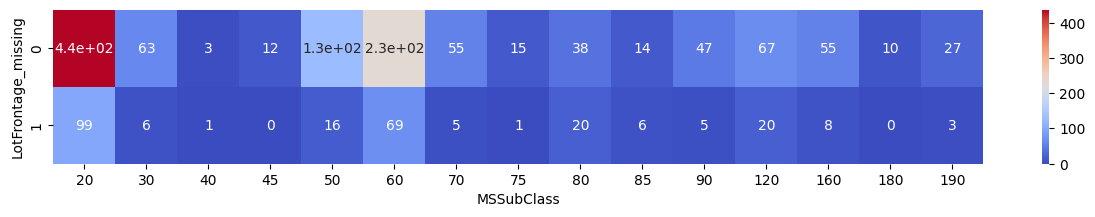

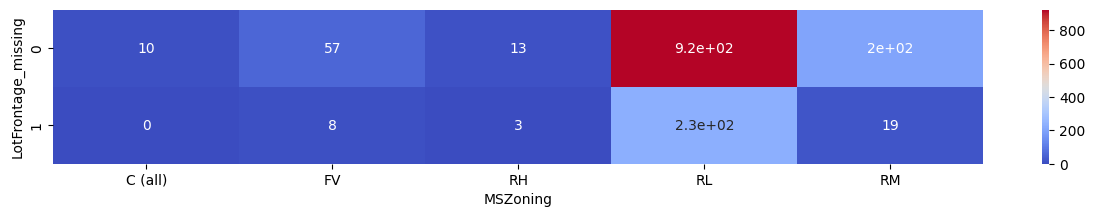

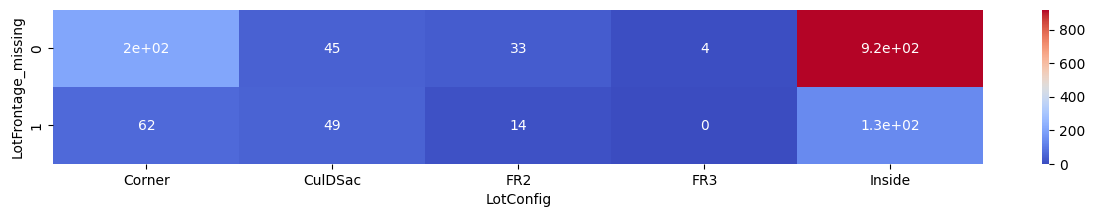

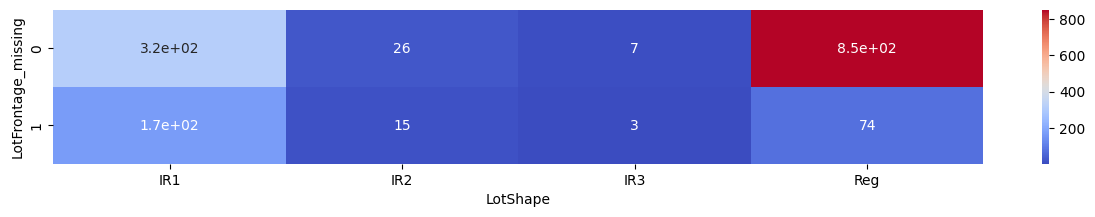

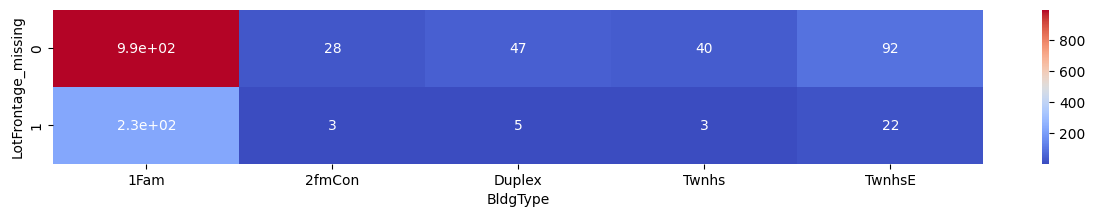

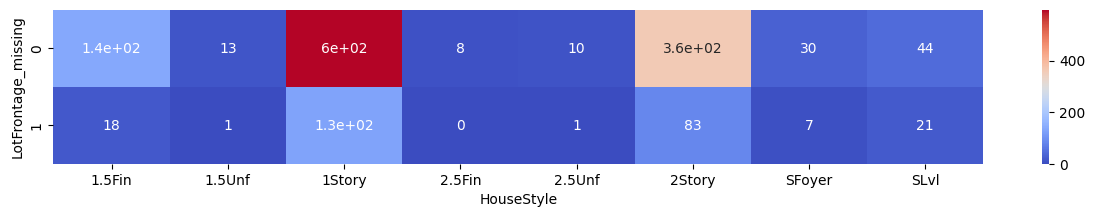

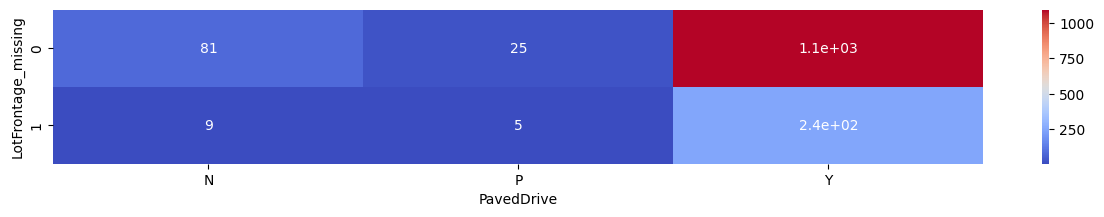

In [38]:
# Are any of the features in rel_to_lf related to LotFrontage's missingness
for col in rel_to_lf:
    plt.figure(figsize=(15,2))
    sb.heatmap(pd.crosstab(missingness_df['LotFrontage_missing'], missingness_df[col]), annot=True, cmap='coolwarm')
    plt.show()

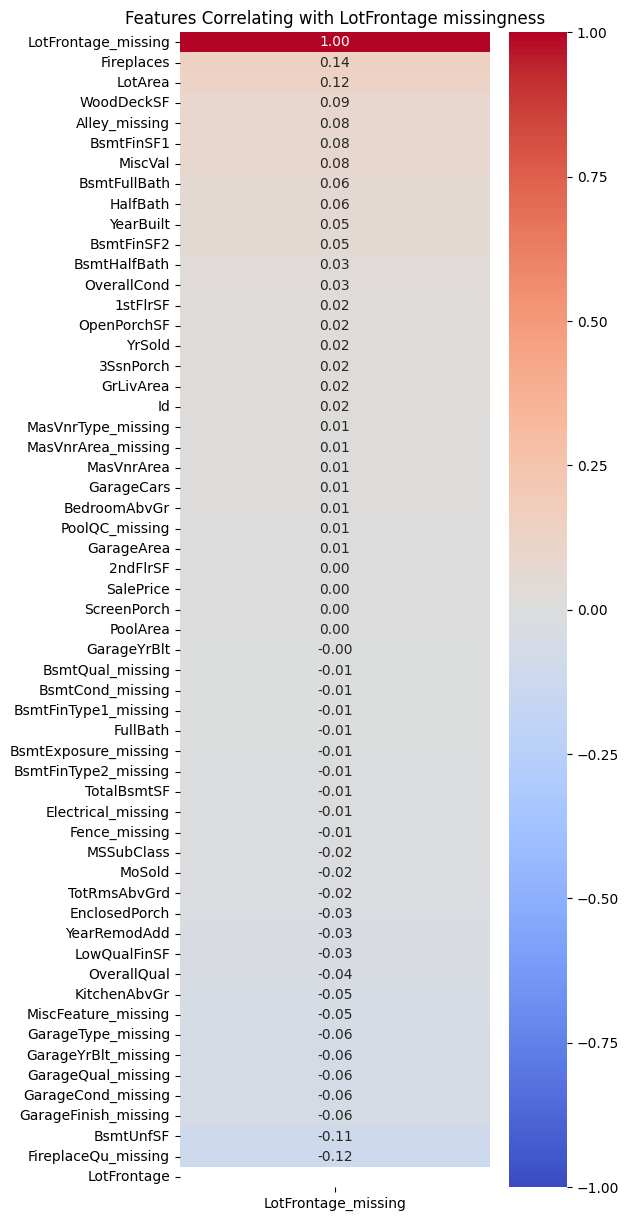

In [39]:
# Show correlations with LotFrontage_missingness
plt.figure(figsize=(5, 15))

heatmap = sb.heatmap(corr_matrix[['LotFrontage_missing']]\
                      .sort_values(by='LotFrontage_missing', ascending=False), annot=True, fmt='.2f', cmap="coolwarm",vmin=-1, vmax=1)
heatmap.set_title('Features Correlating with LotFrontage missingness', fontsize=12)

plt.show()

#### Plan

**1. Drop rows meeting conditions**
- Drop rows where MiscVal is 0 but MiscFeature is not null

- Drop rows where MasVnrType is None but MasVnrArea isn't 0

- Drop row where Electrical system is NaN but Utilities is AllPub

**2. Transform nulls to 0 in:**
- `PoolQC`
- `MiscFeature`
- `Alley`
- `Fence`
- `FireplaceQu`
- `GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageQual`, `GarageCond`
- `BsmtExposure`, `BsmtFinType2`, `BsmtFinType1`, `BsmtCond`, `BsmtQual`
- `MasVnrType`, `MasVnrArea`

**3. Impute nulls in `LotFrontage` using miceforest's ImputationKernel**

<a id="section-three"></a>
# 3. Data Cleaning

<a id="section-three-subsection-one"></a>
### 3.1. Make a copy of the dataset

In [40]:
df = train_data.copy()

<a id="section-three-subsection-two"></a>
### 3.2. Drop ID column

In [41]:
df = df.drop(columns='Id', axis=1)

In [42]:
# Confirm 'Id' column has been dropped
assert df.columns.isin(['Id']).any() == False

<a id="section-three-subsection-three"></a>
### 3.3. Drop rows

In [43]:
# Define function to drop rows meeting condition
def drop_rows_on_condition(df, conditions):
    # Assign number of rows in df to a variable
    old_length = df.shape[0]
    
    # Obtain indices of rows meeting condition(s)
    indices = []
    
    for condition in conditions:
        indices.extend(df[condition].index)
    
    # Drop the rows
    df = df.drop(index=indices, axis=0)
    
    new_length = df.shape[0]
    
    print(f"{old_length - new_length} rows with indices, {indices}, were dropped from DataFrame.")
    
    return df

In [44]:
# Specify conditions for dropping rows
condition_misc = (df["MiscVal"] == 0) & (df['MiscFeature'].notnull()) # Rows where MiscVal == 0 but MiscFeature is not null
condition_masvnr = (df['MasVnrType'] == 'None') & (df['MasVnrArea'] != 0) # Rows where MasVnrType is None but MasVnrArea isn't 0
condition_electrical = (df['Electrical'].isnull()) & (df['Utilities'] == 'AllPub') # Rows where Electrical system is NaN but Utilities is AllPub

conditions = [condition_misc, condition_masvnr, condition_electrical]

In [45]:
# Drop rows
df = drop_rows_on_condition(df, conditions)

8 rows with indices, [873, 1200, 624, 773, 1230, 1300, 1334, 1379], were dropped from DataFrame.


<a id="section-three-subsection-four"></a>
### 3.4 Fill nulls with 0 in all except LotFrontage

In [46]:
def fill_na(df, fill_with=0, exclude=None):
    '''
        Runs calculate_missingness to obtain a list only containing features with nulls.
        Then excludes whatever feature is passed to exclude argument.
        Then fill
    '''
    
    # Get a list of features_with_missingness
    null_per, features_with_missingness = calculate_missingness(df) # Calculate missingness
    features_to_fill = [*features_with_missingness.index] # Make a list of all features with missingness
    
    # Exclude features passed to exclude
    if exclude:
        features_to_fill.remove(exclude) # Remove feature passed to exclude from the features_to_fill list
    
    # Fill nulls for features in features_to_fill
    df[features_to_fill] = df[features_to_fill].fillna(fill_with)
    
    print(f"The following features except {exclude} were filled with {fill_with}:\n{features_to_fill} ")
    
    return df

In [47]:
# Fill na
df = fill_na(df, 0, 'LotFrontage')

The following features except LotFrontage were filled with 0:
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtFinType1', 'BsmtQual', 'MasVnrArea', 'MasVnrType'] 


<a id="section-four"></a>
# 4. Exploratory Data Analysis

1. Visualise the value counts of the categorical features
2. Visualise the distributions of the numerical features
3. Find out the categorical features that are significantly correlated with Saleprice. Group by their categories and plot mean or median of SalePrice
4. Find out numerical features that are significantly correlated with SalePrice. Plot regression plot to visualise the relationship.

<a id="section-four-subsection-one"></a>
### 4.0 Prepare for exploratory data analysis
- Write a function to apply yeo-johnson transformation to a feature
- Create a function to plot regular charts and log charts side by side for numerical columns
- Get a list of numerical and categorical features in the dataset

In [48]:
from sklearn.preprocessing import PowerTransformer

# Define a function to apply yeo-johnson transformation to a feature
def yeojohnson_transform(df, column):
    # Create a PowerTransformer object
    pt = PowerTransformer(method='yeo-johnson', standardize=False)
    
    # Fit the transformer to the column and transform it
    transformed_column = pd.Series(pt.fit_transform(df[[column]]).flatten())
    
    return transformed_column

In [49]:
# Create function to plot regular charts and log charts side by side for numerical columns
def plot_group(df, col_list, sb_method, subplot_dimensions=[10,4], fig_size=(20,20), plot_name='Plot name', transform_=None, **kwargs):
  """
    Plots regular charts and log charts side by side for numerical columns.
    Parameters:
        df (pandas DataFrame): The DataFrame containing the columns to be plotted.
        col_list (list of str): The list of column names to be plotted.
        sb_method (seaborn function): The seaborn plotting function to be used.
        subplot_dimensions (list of int, optional): The dimensions of the subplot grid. Default is [10,4].
        fig_size (tuple of float, optional): The size of the figure. Default is (20,20).
        plot_name (str, optional): The name of the plot. Default is 'Plot name'.
        transform_ (str, optional): The type of transformation to be applied. Default is None.
        **kwargs: Additional keyword arguments to be passed to the seaborn plotting function.
  """    

  plt.figure(figsize=fig_size)
  
  if transform_ == 'log1p':
      for i, col in enumerate(col_list):
        plt.subplot(*subplot_dimensions, i*2+1)
        sb_method(x=df[col], **kwargs, color='blue').set(title=f"{plot_name} {col}", xlabel = '')
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        plt.xticks(rotation=45) # Rotate the xticks by 90 degrees
        
        plt.subplot(*subplot_dimensions, i*2+2)
        sb_method(x=df[col].apply('log1p'), **kwargs, color='red').set(title=f"{plot_name} {col} (log1p)", xlabel = '')
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) # Avoid overlapping between subplots
        plt.xticks(rotation=45) # Rotate the xticks by 90 degrees
    
      plt.show()

  elif transform_ == 'yeo-johnson':
      for i, col in enumerate(col_list):
        plt.subplot(*subplot_dimensions, i*2+1)
        sb_method(x=df[col], **kwargs, color='blue').set(title=f"{plot_name} {col}", xlabel = '')
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        plt.xticks(rotation=45) # Rotate the xticks by 90 degrees
        
        plt.subplot(*subplot_dimensions, i*2+2)
        sb_method(x=yeojohnson_transform(df, col), **kwargs, color='orange').set(title=f"{plot_name} {col} (yeo-johnson)", xlabel = '')
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) # Avoid overlapping between subplots
        plt.xticks(rotation=45) # Rotate the xticks by 90 degrees
    
    
  elif transform_ == 'both':
      for i, col in enumerate(col_list):
        plt.subplot(*subplot_dimensions, i*3+1)
        sb_method(x=df[col], **kwargs, color='blue').set(title=f"{plot_name} {col}", xlabel = '')
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        plt.xticks(rotation=45) # Rotate the xticks by 90 degrees
        
        plt.subplot(*subplot_dimensions, i*3+2)
        sb_method(x=df[col].apply('log1p'), **kwargs,  color='red').set(title=f"{plot_name} {col} (log1p)", xlabel = '')
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) # Avoid overlapping between subplots
        plt.xticks(rotation=45) # Rotate the xticks by 90 degrees
        
        plt.subplot(*subplot_dimensions, i*3+3)
        sb_method(x=yeojohnson_transform(df, col), **kwargs, color='orange').set(title=f"{plot_name} {col} (yeo-johnson)", xlabel = '')
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) # Avoid overlapping between subplots
        plt.xticks(rotation=45) # Rotate the xticks by 90 degrees    

  else:
      for i, col in enumerate(col_list):
        plt.subplot(*subplot_dimensions, i+1)
        sb_method(x=df[col], **kwargs).set(title=f"{plot_name} {col}", xlabel = '')
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) # Avoid overlapping between subplots
        plt.xticks(rotation=45) # Rotate the xticks by 90 degrees
        
       
      plt.show()

In [50]:
# Get a list of categorical features
cat_features = [*df.select_dtypes(include='object').columns]

# Get a list of numerical features
num_features = [*df.select_dtypes(include=np.number).columns]
num_features.remove('SalePrice') # remove SalePrice

<a id="section-four-subsection-two"></a>
### 4.1. Visualise the value_counts of categorical features

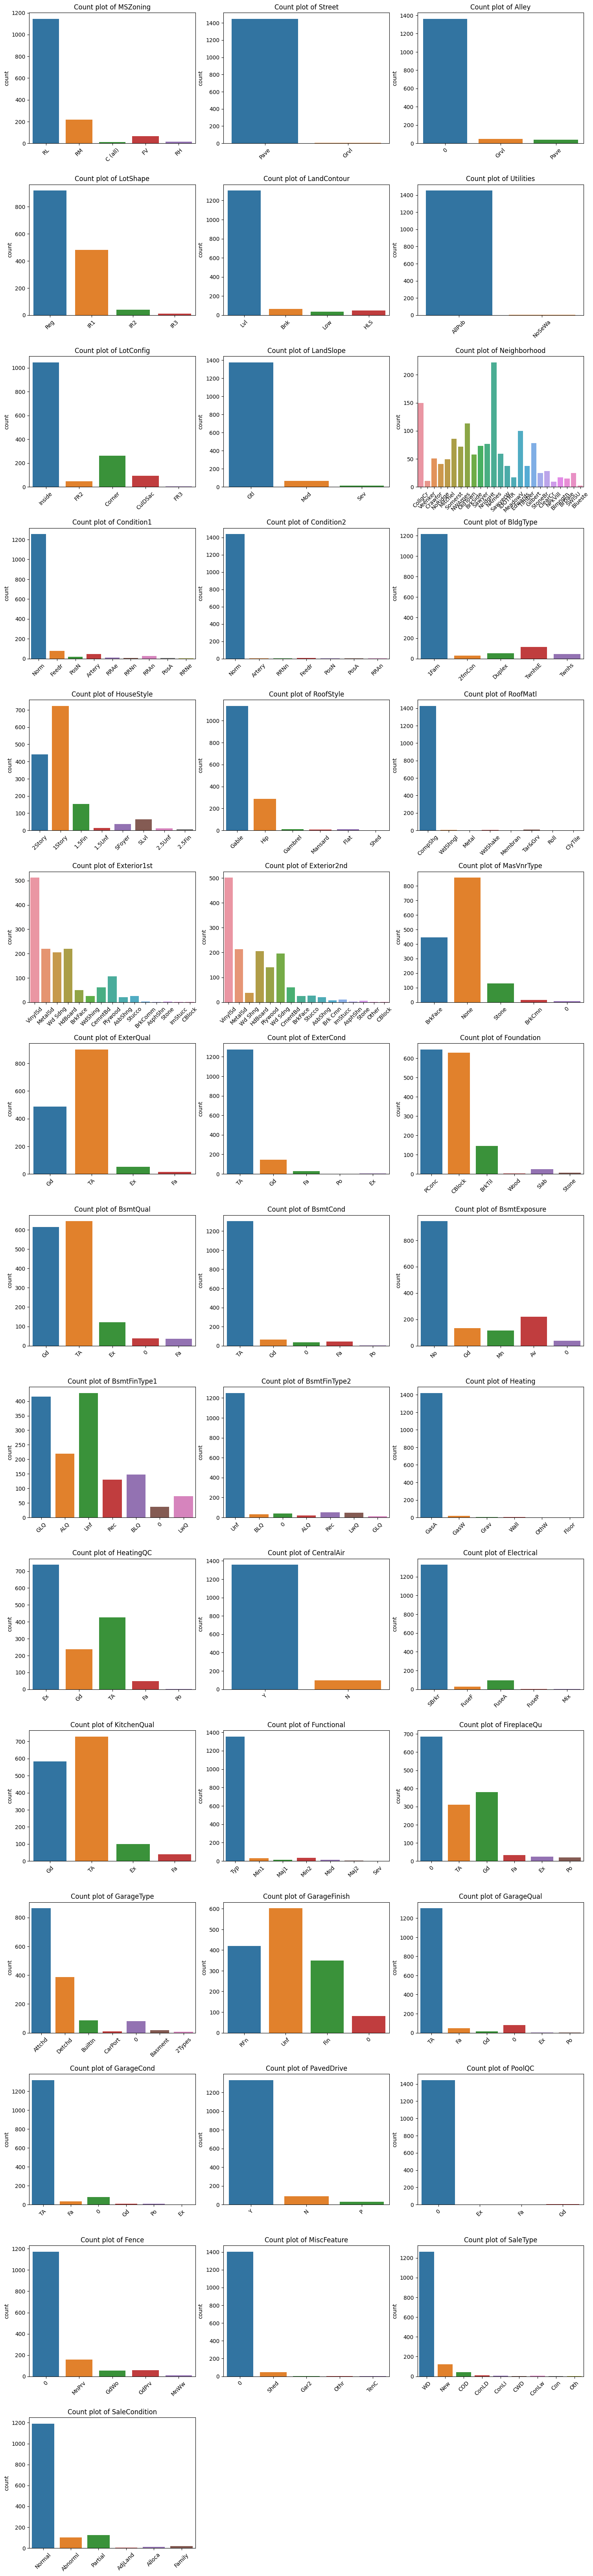

In [51]:
# Plot categorical features
plot_group(df, cat_features, sb.countplot, subplot_dimensions=[15,3], fig_size=(15,65), plot_name='Count plot of');

<a id="section-four-subsection-three"></a>
### 4.2. Visualise the distribution of numerical features

In [52]:
from scipy.stats import skew

# Calculate the skewness of each numerical feature
df[num_features].skew().sort_values(ascending=False)

MiscVal          29.192336
PoolArea         14.787221
LotArea          12.191941
3SsnPorch        10.275369
LowQualFinSF      9.128871
KitchenAbvGr      4.514591
BsmtFinSF2        4.248024
ScreenPorch       4.128840
BsmtHalfBath      4.090233
EnclosedPorch     3.090755
MasVnrArea        2.684803
OpenPorchSF       2.356817
LotFrontage       2.170211
BsmtFinSF1        1.684575
WoodDeckSF        1.537855
TotalBsmtSF       1.522288
MSSubClass        1.410405
1stFlrSF          1.372074
GrLivArea         1.370839
BsmtUnfSF         0.917502
2ndFlrSF          0.817964
OverallCond       0.689701
TotRmsAbvGrd      0.666298
HalfBath          0.659707
Fireplaces        0.650043
BsmtFullBath      0.590232
BedroomAbvGr      0.214687
MoSold            0.213343
OverallQual       0.211462
GarageArea        0.176320
YrSold            0.096688
FullBath          0.033724
GarageCars       -0.343914
YearRemodAdd     -0.509324
YearBuilt        -0.612774
GarageYrBlt      -3.856918
dtype: float64

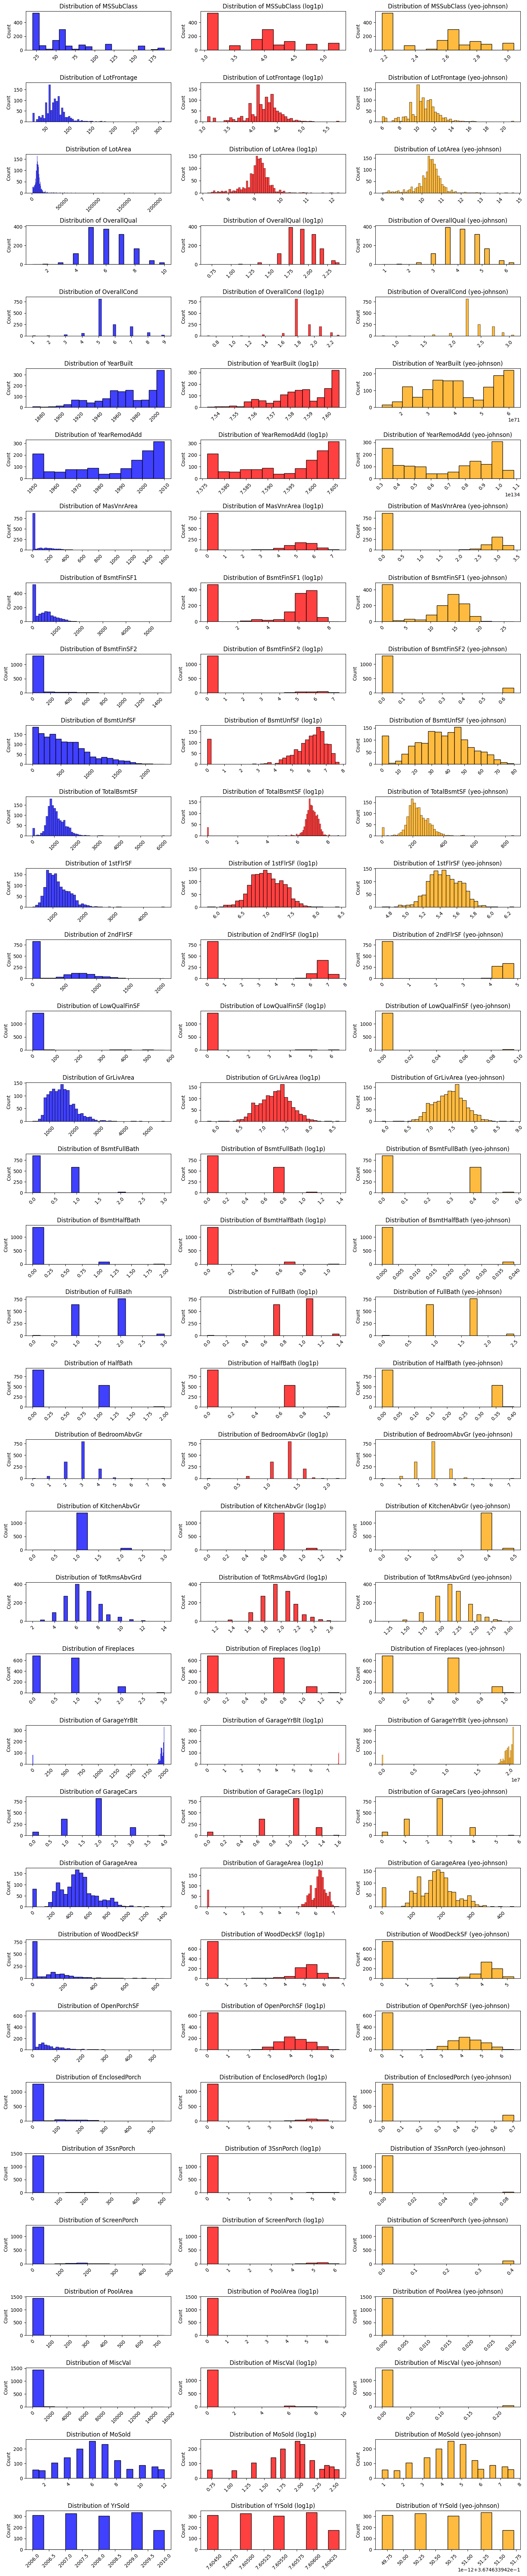

In [53]:
plot_group(df, num_features, sb.histplot, subplot_dimensions=[37,3], fig_size=(15,75), plot_name='Distribution of', transform_='both');

Features like `MiscVal`, `PoolArea`, `LotArea`, and `3SnPorch` have very high skewness. I am comfortable not transforming them because I will be using non-parametric models (RandomForest and XGBoost) which are reasonably robust to skewness. 

If I do find that these features are important for (have a large impact on) prediction, perhaps we can transform them and see if that improves the model's performance.

<a id="section-four-subsection-four"></a>
### 4.3 Visualise the distribution of the target variable, `SalePrice`

In [54]:
# Calculate skewness of SalePrice
df['SalePrice'].skew()

1.8783538321356417

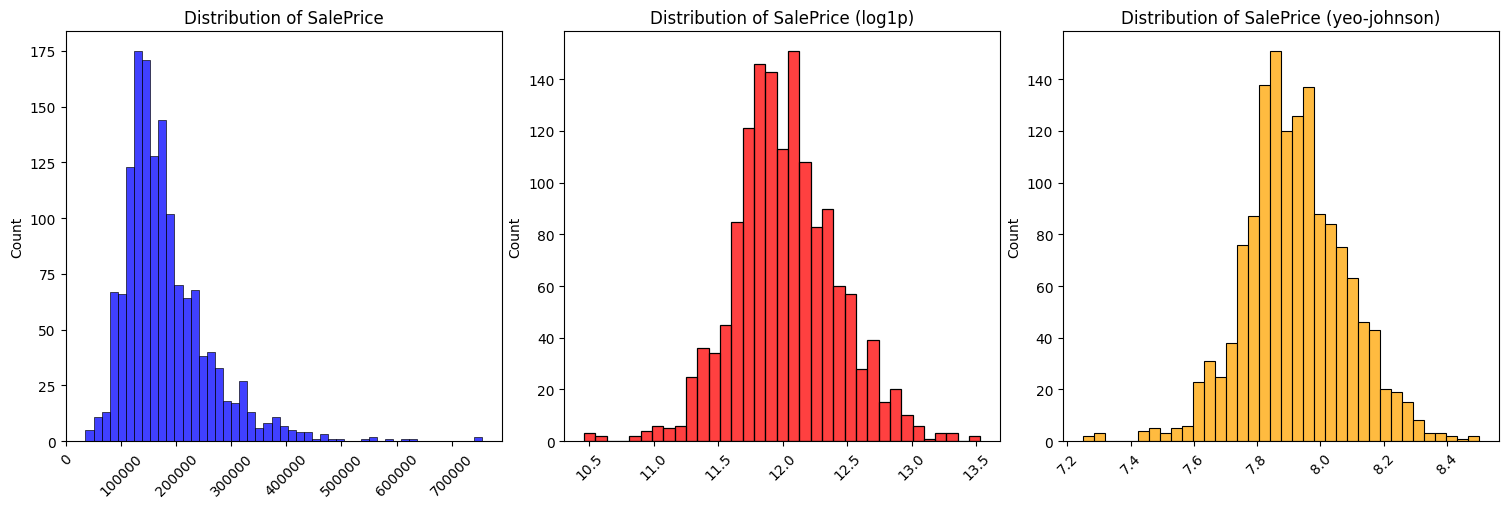

In [55]:
# Visualise the distribution of the target variable, SalePrice
plot_group(df, ['SalePrice'], sb.histplot, [1,3], (15,5), plot_name='Distribution of', transform_='both')

`SalePrice` has a moderate positive skewness. I will be training models that are robust to moderate skewness and can handle non-normal distributions, so (for this first attempt) I won't be transforming `SalePrice` or any feature. 

<a id="section-four-subsection-five"></a>
### 4.4 Assess feature relationship to `SalePrice`

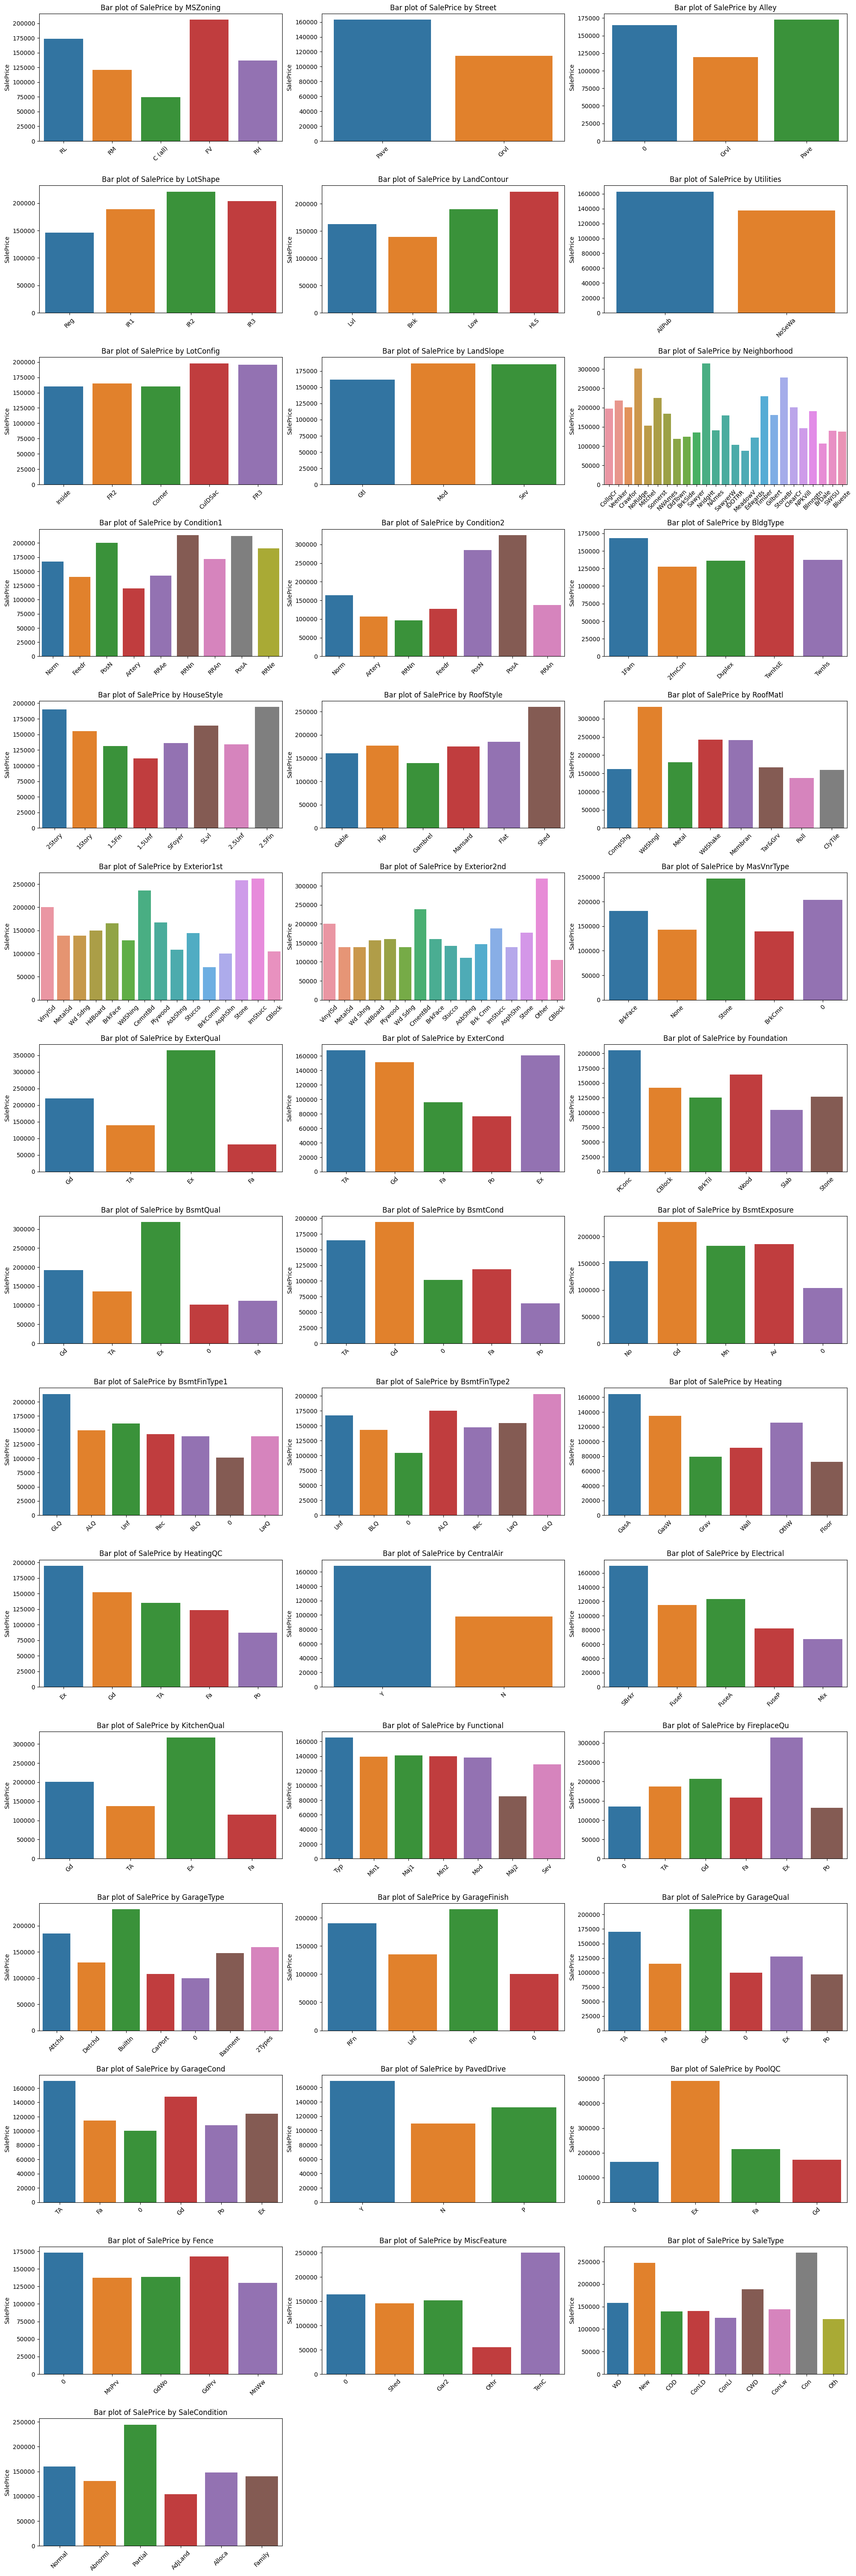

In [56]:
# Plot bar plot of SalePrice by categorical features
plot_group(df, cat_features, sb.barplot, subplot_dimensions=[15,3], fig_size=(20,60), plot_name='Bar plot of SalePrice by', y=df['SalePrice'], estimator='median', errorbar=None);

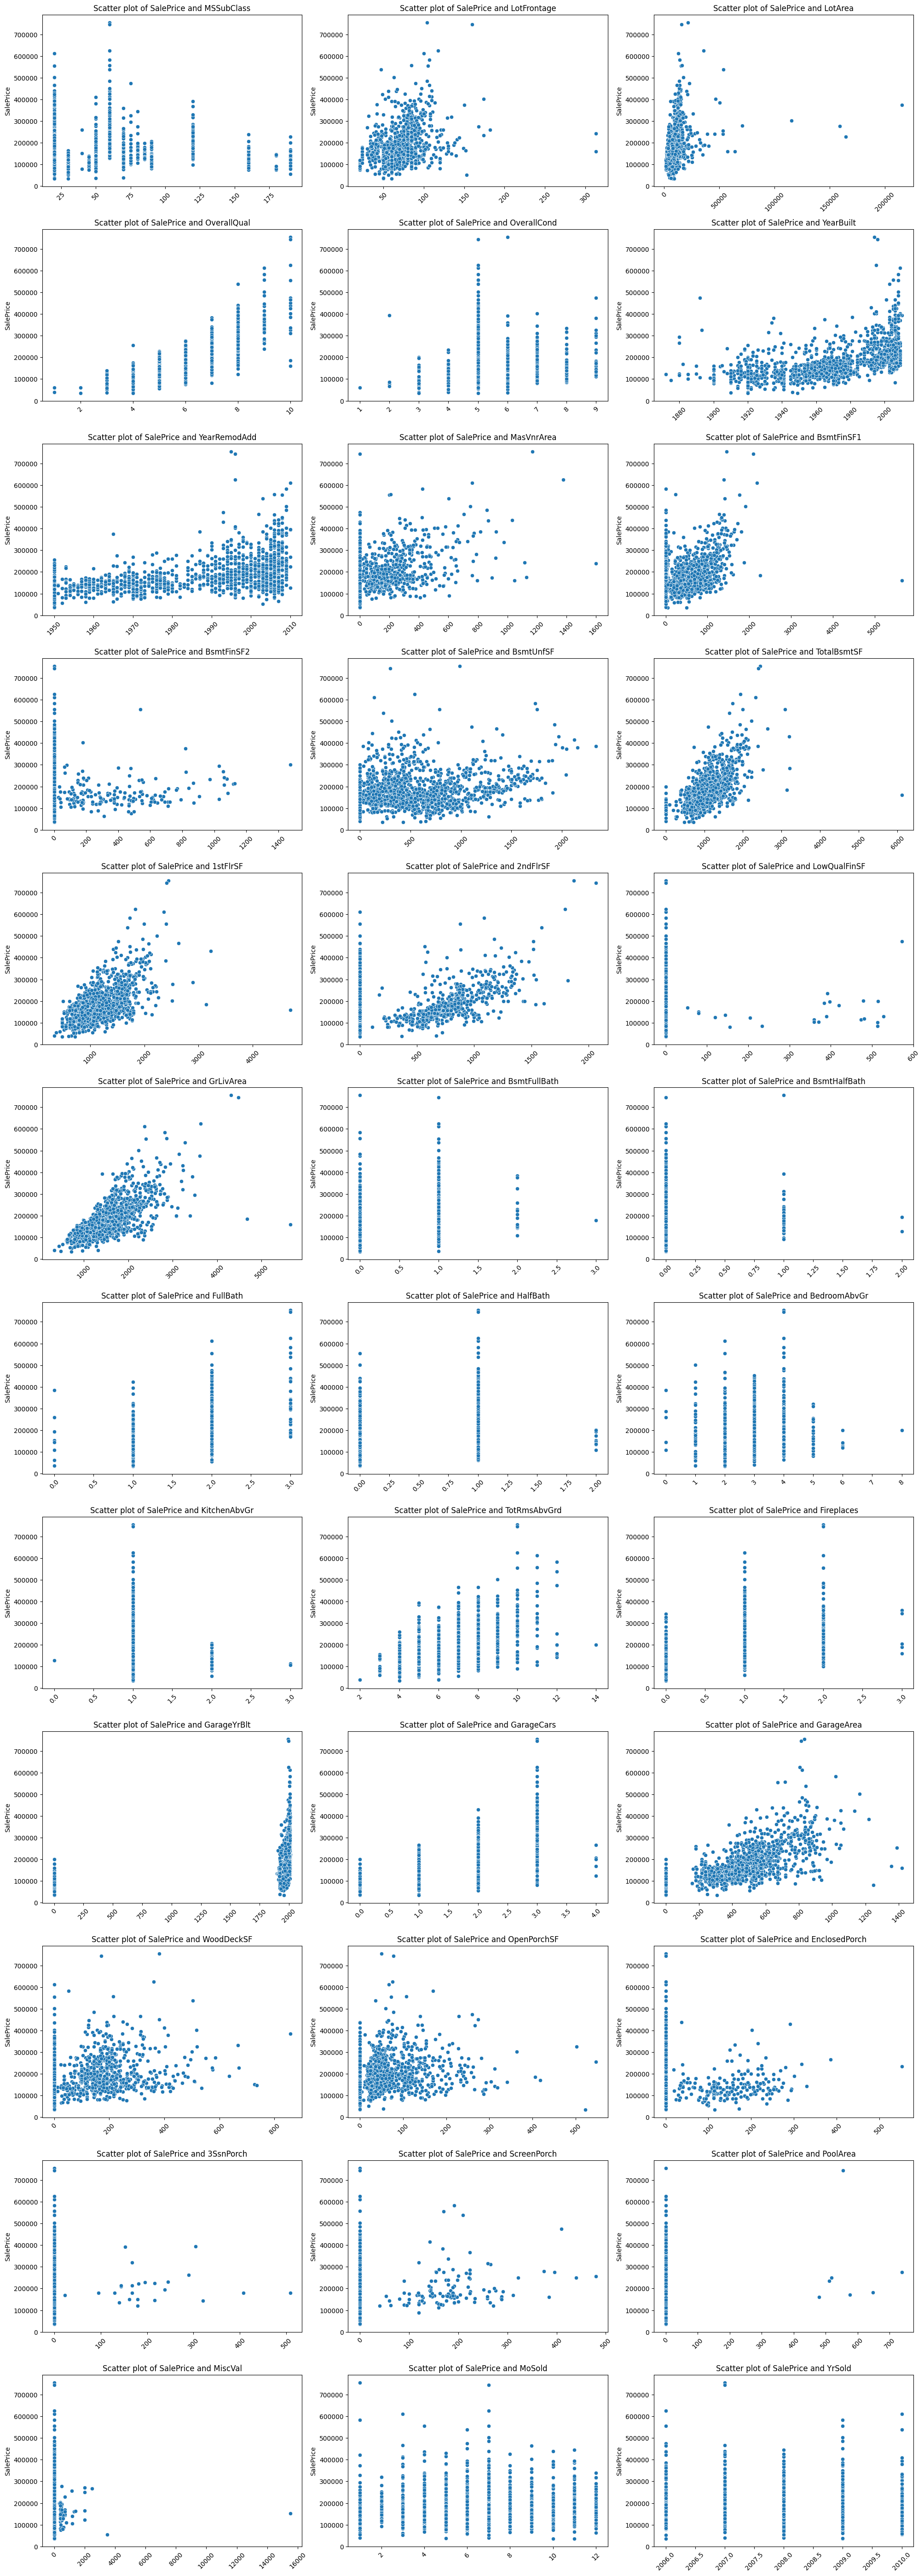

In [57]:
# Plot scatter plot of numerical features to SalePrice
plot_group(df, num_features, sb.scatterplot, subplot_dimensions=[13,3], fig_size=(20,60), plot_name='Scatter plot of SalePrice and', y=df['SalePrice']);

Some features (Basement measurements, `LotFrontage`, etc) don't seem to have linear relationships with the target variable, `SalePrice`.

<a id="section-five"></a>
# 5. Data Preprocessing
1. Prepare for data preprocessing
2. Encode categorical features to numerical
3. Impute nulls in LotFrontage using miceforest

<a id="section-five-subsection-one"></a>
### 5.0 Prepare for data preprocessing

In [58]:
transformed_df = df.copy()

In [59]:
# Import packages for encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

#### 5.0.1 Determine the type of encoding for each feature

**A table of the features and the type of encoding that will be applied**

| Feature | encode_type |
|------|-----|
| MSZoning | One-Hot Encoding
| Street | One_Hot Encoding
| LotShape | Ordinal Encoding
| LandContour | One-Hot Encoding
| Utilities | Ordinal Encoding
| LotConfig	|One-Hot Encoding
| LandSlope	|One-Hot Encoding
| Neighborhood	|One-Hot Encoding
| Condition1	|One-Hot Encoding
| Condition2	|One-Hot Encoding
| BldgType	|One-Hot Encoding
| HouseStyle	|One-Hot Encoding
| RoofStyle	|One-Hot Encoding
| RoofMatl	|One-Hot Encoding
| Exterior1st	|One-Hot Encoding
| Exterior2nd	|One-Hot Encoding
| MasVnrType	|One-Hot Encoding
| MiscFeature	|One-Hot Encoding
| ExterQual	|Ordinal Encoding
| ExterCond	|Ordinal Encoding
| Foundation	|One-Hot Encoding
| BsmtQual	|Ordinal Encoding
| BsmtCond	|Ordinal Encoding
| BsmtExposure	|Ordinal Encoding
| BsmtFinType1	|Ordinal Encoding
| BsmtFinType2	|Ordinal Encoding
| Heating	|One-Hot Encoding
| HeatingQC	|Ordinal Encoding
| CentralAir	|Binary Encoding
| Electrical	|One-Hot Encoding
| KitchenQual	|Ordinal Encoding
| Functional	|Ordinal Encoding
| FireplaceQu	|Ordinal Encoding
| GarageType	|One-Hot Encoding
| GarageFinish	|Ordinal Encoding
| GarageQual	|Ordinal Encoding
| GarageCond	|Ordinal Encoding
| PavedDrive	|Ordinal Encoding
| SaleType	|One-Hot Encoding
| SaleCondition	|One-Hot Encoding

In [60]:
# Categorical features that will be one-hot encoded
cat_features_ohe = ['MSZoning', 'Street', 'LotConfig','LandContour', 'LandSlope','Neighborhood','Condition1','Condition2','BldgType', 'HouseStyle', 
                    'RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd', 'MasVnrType', 'MiscFeature', 'Foundation', 'Heating', 
                    'Electrical', 'GarageType', 'SaleType', 'SaleCondition']

In [61]:
# Features that will be ordinal encoded
cat_features_oe = [x for x in set(cat_features).difference(set(cat_features_ohe))]
cat_features_oe

['KitchenQual',
 'LotShape',
 'ExterCond',
 'BsmtFinType1',
 'Alley',
 'Fence',
 'CentralAir',
 'PavedDrive',
 'BsmtCond',
 'HeatingQC',
 'FireplaceQu',
 'BsmtExposure',
 'Functional',
 'ExterQual',
 'GarageCond',
 'PoolQC',
 'GarageQual',
 'BsmtQual',
 'GarageFinish',
 'Utilities',
 'BsmtFinType2']

#### 5.0.2 Convert the categorical features to consistent type (strings, in this case) to facilitate encoding

In [62]:
transformed_df[cat_features] = transformed_df[cat_features].astype('str')

<a id="section-five-subsection-two"></a>
### 5.1 Time for Encoding

In [63]:
# Create function for encoding the features
def encode_features(df, features, type='OneHotEncoder', drop=False, cols_to_drop=None):
    '''
    Args:
    df: dataframe containing features to be encoded
    features: list of features to be encoded
    type: type of encoding
    drop: if you want columns to be dropped from the df after encoding
    cats_to_drop: the columns
    '''
    df = df.reset_index(drop=True)
    
    # Initialise the encoder
    if type == 'OneHotEncoder':
        ohe = OneHotEncoder(sparse=False)
        
        encoded_df = pd.DataFrame()

        for col in features:
            # one-hot encode the remaining categories
            ohe_results = ohe.fit_transform(df[[col]])

            # Convert ohe_results to df
            ohe_results_df = pd.DataFrame(ohe_results, columns=ohe.get_feature_names_out([col]))

            # Concatenate ohe_results_df with transformed_df
            encoded_df = pd.concat([encoded_df, ohe_results_df], axis=1)
        
        print(f"The following {len(features)} features were one-hot encoded: {features}\n")
    
    elif type == 'OrdinalEncoder':
        oe = OrdinalEncoder(categories=[desired_orders[feature] for feature in features])

        encoded_cols = oe.fit_transform(df[features])  
        
        encoded_df = pd.DataFrame(encoded_cols, columns=features)
        
        # Add suffixes to column names
        suffix = '_oe'  # Define the desired suffix
        encoded_df = encoded_df.add_suffix(suffix)
        
        print(f"The following {len(features)} features were ordinal encoded: {features}\n")
    
    # Concatenate encoded_df with main DataFrame
    final_df = pd.concat([df, encoded_df], axis=1)
    
    if drop:
        # Drop original encoded columns
        final_df = final_df.drop(columns=features)
        
        if cols_to_drop is not None:
            # Drop one category of each encoded feature
            final_df = final_df.drop(columns=cols_to_drop)
        
        print(f"And the following categories were dropped: {cols_to_drop}\n and the following {len(features)} features: {features}")
        
        return final_df, encoded_df
    
    else:
        return final_df, encoded_df

#### 5.1.1 One-Hot Encoding
- For each feature, identify the categories with the lowest frequency 
- One-hot encode the appropriate features using OneHotEncoder

##### Obtain a list of categories with the lowest frequency in each feature. These will dropped after one-hot encoding.

In [64]:
def get_lowest_freq_cats(df, cat_features_ohe=cat_features_ohe):
    # Get a list of the lowest-frequency cat_features_ohe categories
    lowest_freq_cats = []

    # loop over each categorical feature
    for col in cat_features_ohe:
        # get the value counts for each category
        vc = df[col].value_counts()
        # get the name of the category with the lowest frequency
        lowest_freq_cat = vc.index[-1]
        # drop the category with the lowest frequency
        lowest_freq_cats.append(lowest_freq_cat)
        
    # Convert to NumPy array to aid vectorization
    cat_features_np = np.array(cat_features_ohe)
    lowest_freq_np = np.array(lowest_freq_cats)
    
    # Concatenate both numpy arrays to match the column names in one_hot_df
    concatenate_strings = np.vectorize(lambda x, y: x + '_' + y)

    # Concatenate the arrays to create a list of columns that will be dropped after One-Hot Encoding
    drop_after_ohe = concatenate_strings(cat_features_np, lowest_freq_np)
    
    drop_after_ohe = [*drop_after_ohe]
    
    return drop_after_ohe

In [65]:
drop_after_ohe = get_lowest_freq_cats(transformed_df)

In [66]:
len(drop_after_ohe)

22

In [67]:
# One-Hot Encode cat_features_ohe
encoded_df, ohe_only = encode_features(transformed_df, cat_features_ohe, type='OneHotEncoder', drop=True, cols_to_drop=drop_after_ohe)

The following 22 features were one-hot encoded: ['MSZoning', 'Street', 'LotConfig', 'LandContour', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MiscFeature', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition']

And the following categories were dropped: ['MSZoning_C (all)', 'Street_Grvl', 'LotConfig_FR3', 'LandContour_Low', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Condition1_RRNe', 'Condition2_RRAn', 'BldgType_2fmCon', 'HouseStyle_2.5Fin', 'RoofStyle_Shed', 'RoofMatl_ClyTile', 'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'MasVnrType_0', 'MiscFeature_TenC', 'Foundation_Wood', 'Heating_Floor', 'Electrical_Mix', 'GarageType_2Types', 'SaleType_Oth', 'SaleCondition_AdjLand']
 and the following 22 features: ['MSZoning', 'Street', 'LotConfig', 'LandContour', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Roo

In [68]:
encoded_df.shape

(1452, 203)

#### 5.1.2 Time for Ordinal Encoding
- Create a dictionary of the custom orders for ordinal encoding
- Encode the appropriate features using OrdinalEncoder, passing the order dictionary to it

In [69]:
# Define desired orders for ordinal encoding of each column
desired_orders = {
    'Utilities': ['0', 'ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
    'ExterQual': ['0', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['0', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'HeatingQC': ['0', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['0', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['0', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['0', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['0', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'Functional': ['0', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'GarageFinish': ['0', 'Unf', 'RFn', 'Fin'],
    'PavedDrive': ['N', 'P', 'Y'],
    'BsmtQual': ['0', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['0', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'FireplaceQu': ['0', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageQual': ['0', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['0', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PoolQC': ['0', 'Fa', 'TA', 'Gd', 'Ex'],
    'LotShape': ['0', 'IR3', 'IR2', 'IR1', 'Reg'],
    'Alley': ['0', 'Pave', 'Grvl'],
    'Fence': ['0', 'MnWw', 'MnPrv', 'GdWo', 'GdPrv'],
    'CentralAir': ['N', 'Y']
}

In [70]:
encoded_df_oe, oe_only = encode_features(encoded_df, cat_features_oe, type='OrdinalEncoder', drop=True)

The following 21 features were ordinal encoded: ['KitchenQual', 'LotShape', 'ExterCond', 'BsmtFinType1', 'Alley', 'Fence', 'CentralAir', 'PavedDrive', 'BsmtCond', 'HeatingQC', 'FireplaceQu', 'BsmtExposure', 'Functional', 'ExterQual', 'GarageCond', 'PoolQC', 'GarageQual', 'BsmtQual', 'GarageFinish', 'Utilities', 'BsmtFinType2']

And the following categories were dropped: None
 and the following 21 features: ['KitchenQual', 'LotShape', 'ExterCond', 'BsmtFinType1', 'Alley', 'Fence', 'CentralAir', 'PavedDrive', 'BsmtCond', 'HeatingQC', 'FireplaceQu', 'BsmtExposure', 'Functional', 'ExterQual', 'GarageCond', 'PoolQC', 'GarageQual', 'BsmtQual', 'GarageFinish', 'Utilities', 'BsmtFinType2']


<a id="section-five-subsection-three"></a>
### 5.2 Impute LotFrontage using:
- miceforest's ImputationKernel
- mean
- median


Compare performance

#### 5.2.1 Miceforests' Imputation

In [71]:
!pip install miceforest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 34.6 MB/s eta 0:00:00


In [72]:
# Import ImputationKernel 
from miceforest import ImputationKernel

**Select features that are moderately to strongly correlated with LotFrontage**

In [73]:
def mice_impute(df, col='LotFrontage'):
    mice_kernel = ImputationKernel(
                    data = df,
                    save_all_iterations = True,
                    random_state = 17
                    )
    # Impute LotFrontage using miceforest's ImputationKernel
    mice_kernel.mice(2)
    mice_imputation = mice_kernel.complete_data()
    
    df[col] = mice_imputation[col]
    return df, mice_imputation

In [74]:
df_no_nulls, mice_imp_result = mice_impute(encoded_df_oe)

#### 5.2.2 Mean imputation

In [75]:
mean_lotfrontage = encoded_df['LotFrontage'].mean()

In [76]:
mean_imp_df = encoded_df.fillna(mean_lotfrontage)

#### 5.2.3 Median imputation

In [77]:
median_lotfrontage = encoded_df['LotFrontage'].median()

In [78]:
median_imp_df = encoded_df.fillna(median_lotfrontage)

#### 5.2.4 Which imputation method is better?

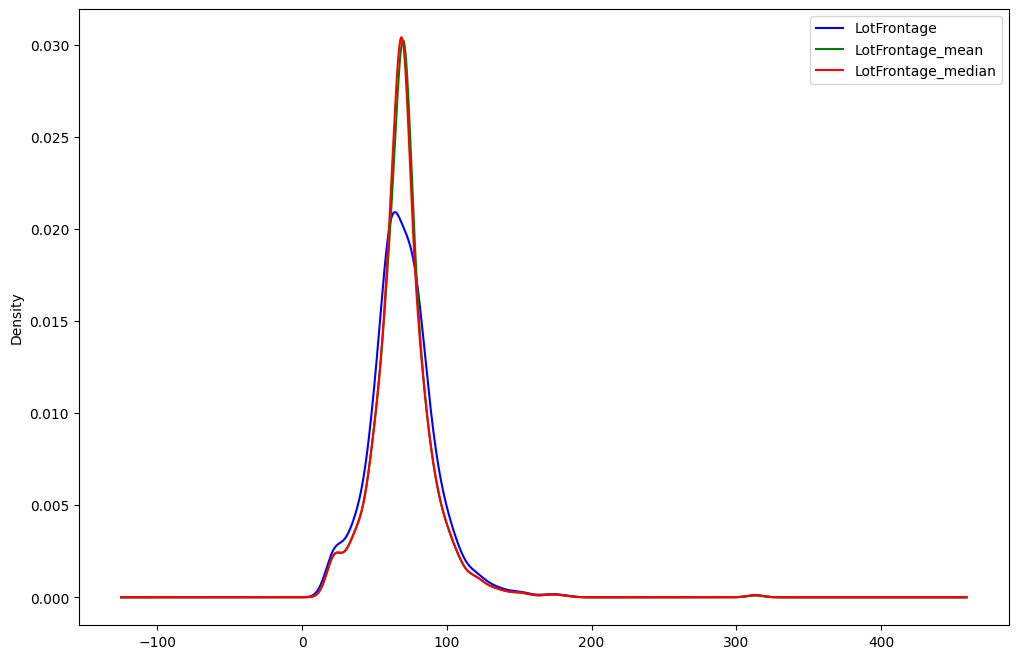

In [79]:
# Plot LotFrontage distribution: Original data vs mean vs median
plt.figure(figsize=(12,8))

encoded_df["LotFrontage"].plot(kind='kde', color='blue', label='LotFrontage')
mean_imp_df["LotFrontage"].plot(kind='kde', color='green', label='LotFrontage_mean')
median_imp_df["LotFrontage"].plot(kind='kde', color='red', label='LotFrontage_median')

plt.legend()

plt.show()

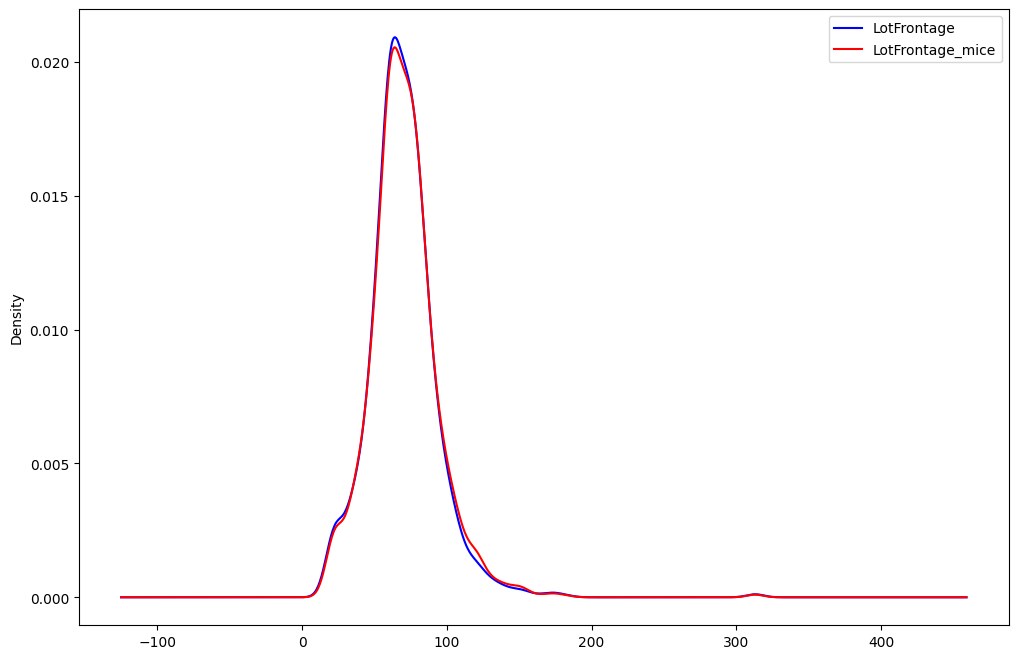

In [80]:
# Plot LotFrontage distribution: Original data vs mice
plt.figure(figsize=(12,8))

encoded_df["LotFrontage"].plot(kind='kde',color='blue', label='LotFrontage')
df_no_nulls["LotFrontage"].plot(kind='kde',color='red', label='LotFrontage_mice')

plt.legend()

plt.show()

There's overlap between the original LotFrontage data and the mice-imputed LotFrontage data. Thus, mice imputation is better than simply imputing mean or median.

<a id="section-six"></a>
# 6. Feature Selection
1. Check for multicollinearity
2. Which are the predictive features?

<a id="section-six-subsection-one"></a>
### 6.0 Check for multicollinearity

In [81]:
# Split the data into X (features) and y (target variable)
X = df_no_nulls.drop('SalePrice', axis=1)
y = df_no_nulls['SalePrice']

VIF values:
        VIF Factor                Feature
0    9.098795e+01             MSSubClass
1    3.232447e+01            LotFrontage
2    6.171228e+00                LotArea
3    1.068457e+02            OverallQual
4    6.423647e+01            OverallCond
5    5.860016e+04              YearBuilt
6    3.203017e+04           YearRemodAdd
7    3.906857e+00             MasVnrArea
8             inf             BsmtFinSF1
9             inf             BsmtFinSF2
10            inf              BsmtUnfSF
11            inf            TotalBsmtSF
12            inf               1stFlrSF
13            inf               2ndFlrSF
14            inf           LowQualFinSF
15            inf              GrLivArea
16   4.700457e+00           BsmtFullBath
17   1.500422e+00           BsmtHalfBath
18   3.596550e+01               FullBath
19   4.690860e+00               HalfBath
20   4.371980e+01           BedroomAbvGr
21   9.913528e+01           KitchenAbvGr
22   1.089759e+02           TotRmsAbvGrd
23 

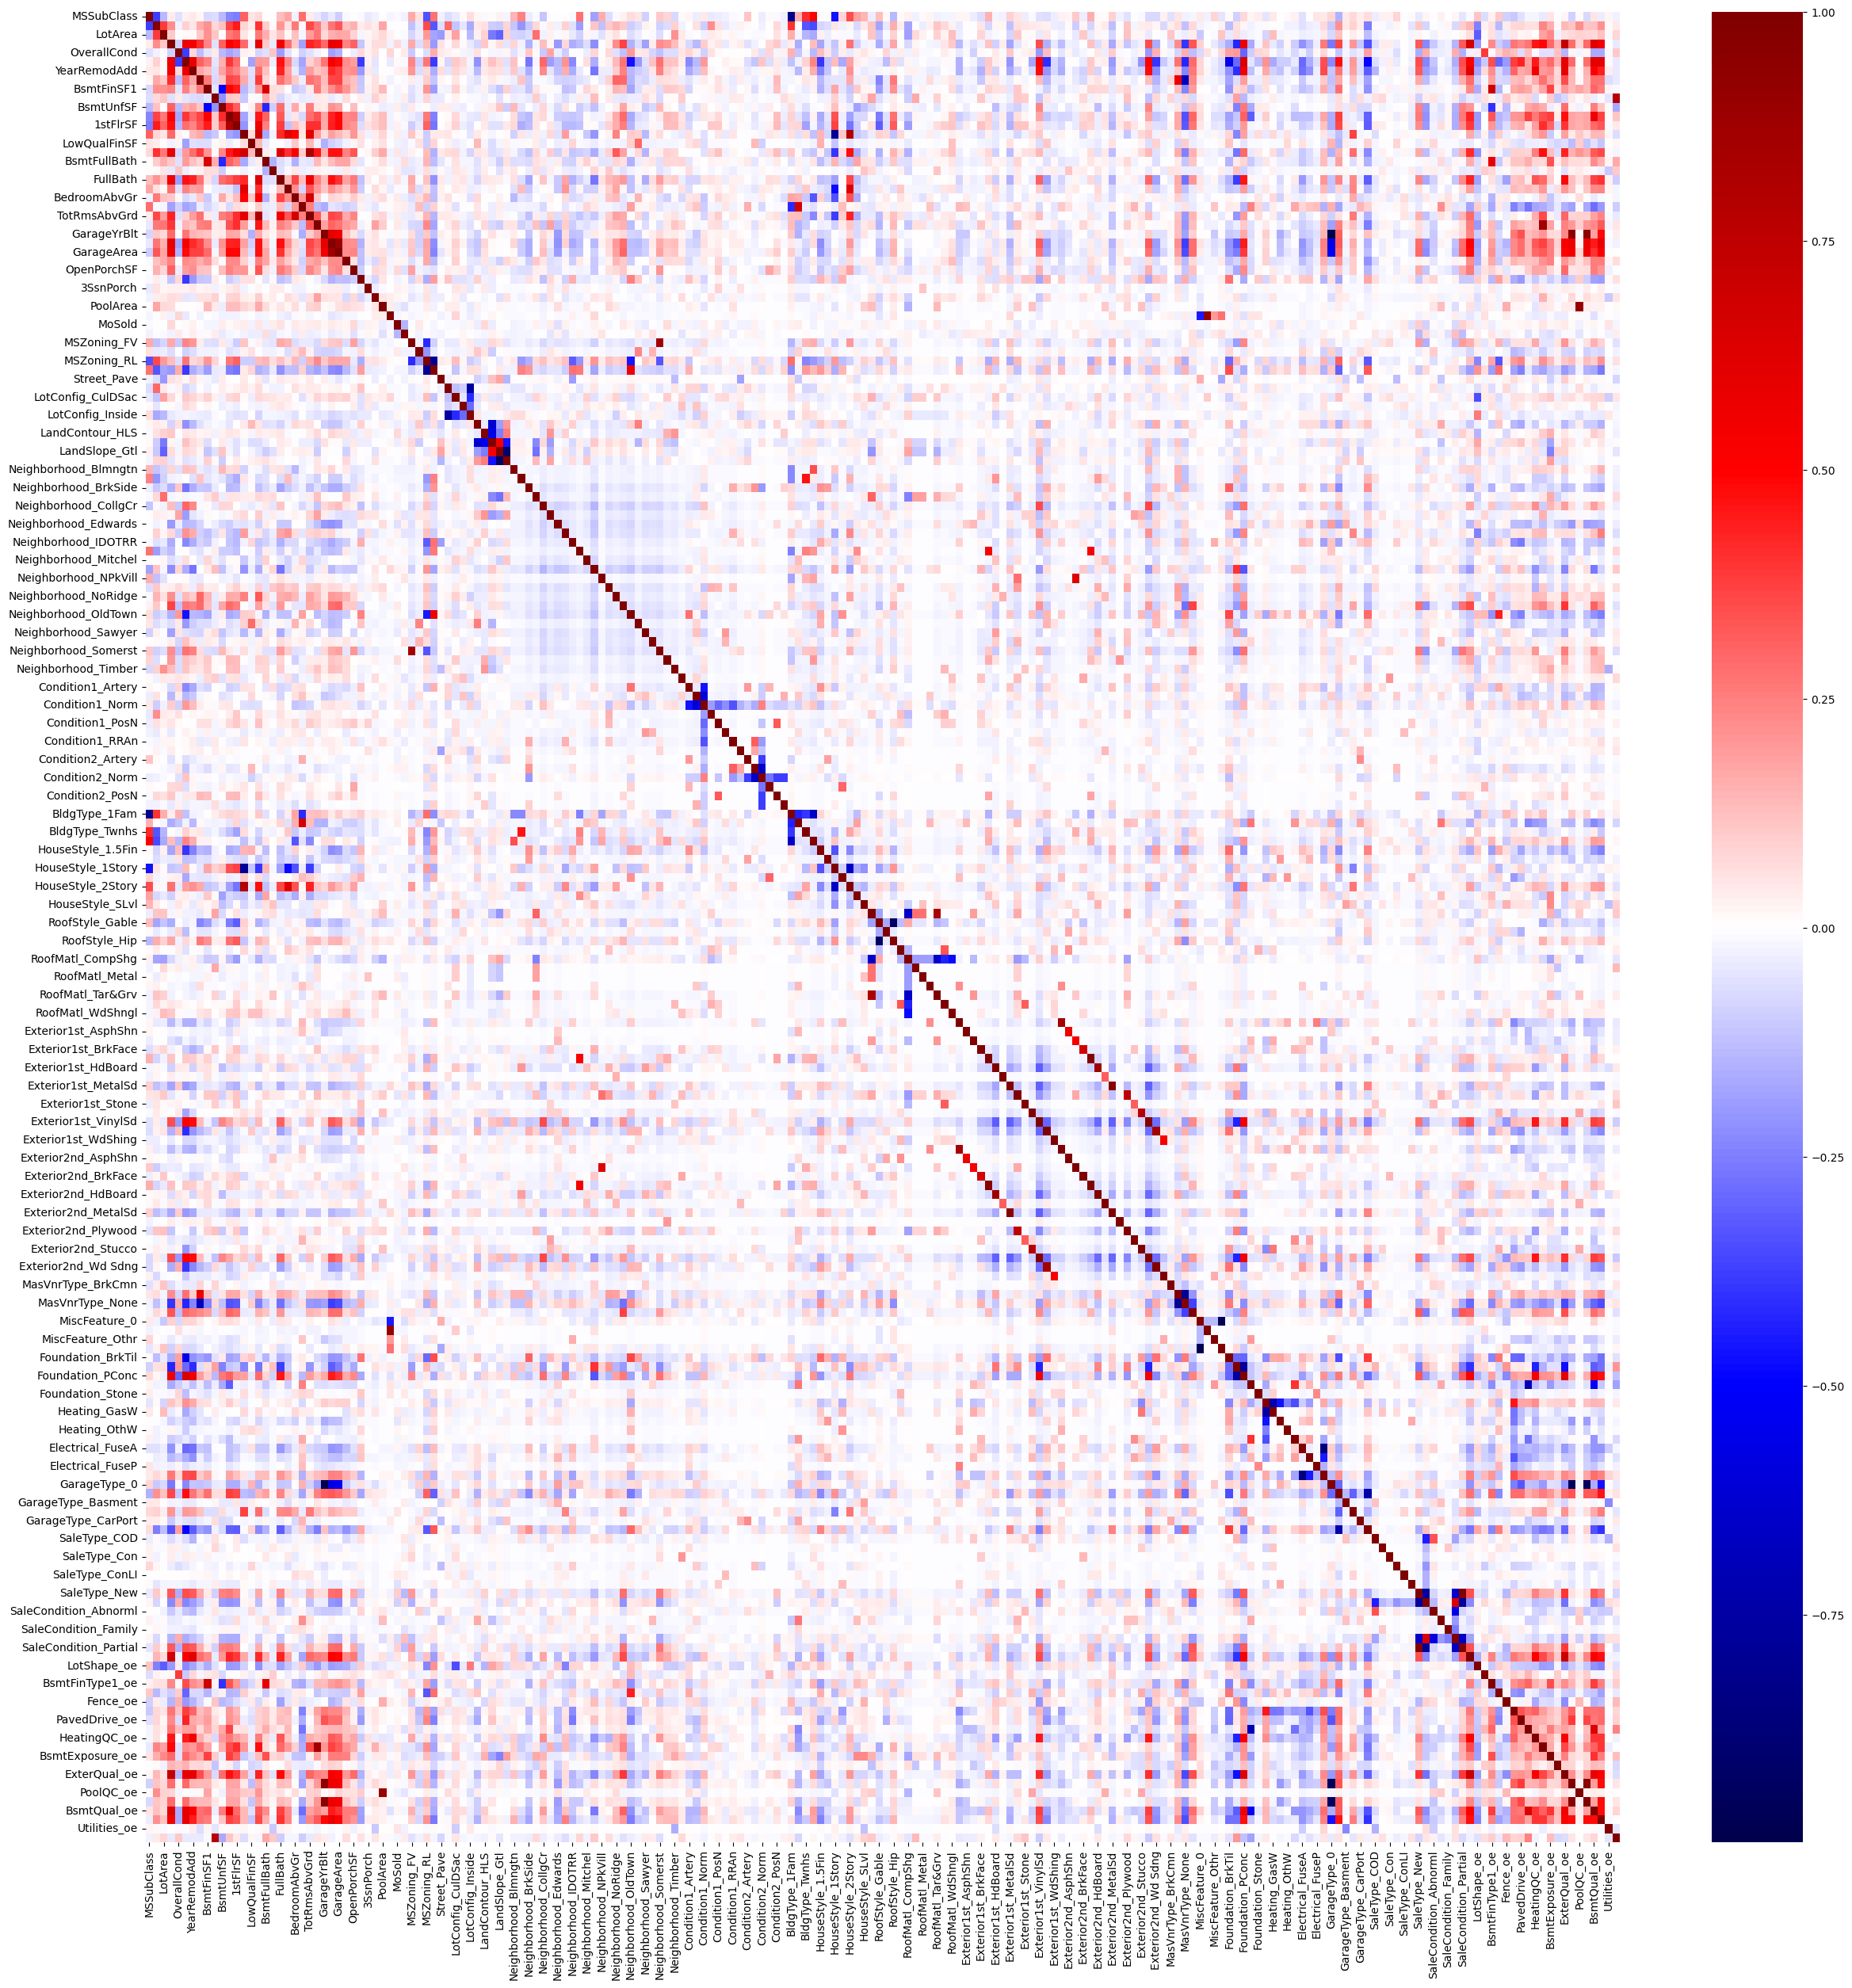

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# compute the correlation matrix
corr_matrix = X.corr()

# compute the VIF values
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Feature'] = X.columns

# print the VIF values and visualize the correlation matrix

plt.figure(figsize=(30,30))
sb.heatmap(corr_matrix, annot=False, cmap='seismic')
print("VIF values:\n", vif)

Phew!!! Those are massive VIFs. Some features even have VIF values of "inf," meaning one or more features can be perfectly predicted from a linear combination of other features.

Options:
1. Drop the features with VIF values of inf
2. Apply regularization (e.g. Ridge regression) to reduce the impact of highly correlated values while still keeping them in the model
3. Dimensionality reduction with PCA

I'll go with regularization. 

<a id="section-six-subsection-two"></a>
### 6.1 What are the predictive features in my dataset?

In [83]:
import scipy
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr

# Split the data into X (features) and y (target variable)
X_chi = df_no_nulls.drop('SalePrice', axis=1)
y_chi = df_no_nulls['SalePrice']

# Identifying the predictive features using the Pearson Correlation p-value
correlation_data = pd.DataFrame(
    [scipy.stats.pearsonr(X_chi[col], y_chi) for col in X_chi.columns], 
    columns=["Pearson Corr.", "p-value"], 
    index=X_chi.columns).round(4)

# Filter features with correlation > 0.5 and p-value < 0.05
significant_features = correlation_data[(correlation_data["Pearson Corr."].abs() > 0.5) & (correlation_data["p-value"] < 0.05)]

significant_features.sort_values('Pearson Corr.', ascending=False)

Pearson Corr.  p-value
OverallQual             0.7910      0.0
GrLivArea               0.7092      0.0
ExterQual_oe            0.6832      0.0
KitchenQual_oe          0.6594      0.0
GarageCars              0.6403      0.0
GarageArea              0.6230      0.0
TotalBsmtSF             0.6138      0.0
1stFlrSF                0.6057      0.0
BsmtQual_oe             0.5848      0.0
FullBath                0.5600      0.0
GarageFinish_oe         0.5496      0.0
TotRmsAbvGrd            0.5355      0.0
YearBuilt               0.5231      0.0
FireplaceQu_oe          0.5207      0.0
YearRemodAdd            0.5065      0.0

<a id="section-seven"></a>
# 7. Regression Model Training and Testing

<a id="section-seven-subsection-one"></a>
### 7.0 Prepare the train and test datasets
1. Define final transform function
2. Merge raw train and test dataset and apply final transformation
3. Split train and test data

#### 7.0.1 Define final transform function

In [84]:
def transform_dataset(df):
    # Drop Id column
    df = df.drop(columns='Id', axis=1)

    # 2. Drop rows meeting conditions
    # df = drop_rows_on_condition(df, conditions)

    # 3. Fill nulls with 0 in all except LotFrontage
    df = fill_na(df, 0, 'LotFrontage')

    # 4. Select features with datatype 'object' and convert to str dtype
    df[cat_features] = df[cat_features].astype('str')

    # 5. Get low_frequency_cats for test data
    drop_cols_test = get_lowest_freq_cats(df, cat_features_ohe=cat_features_ohe)
    
    # 6. One-Hot Encode
    encoded_df, ohe_only = encode_features(df, cat_features_ohe, type='OneHotEncoder', drop=True, cols_to_drop=drop_cols_test)

    # 7. Ordinal Encode
    encoded_df_oe, oe_only = encode_features(encoded_df, cat_features_oe, type='OrdinalEncoder', drop=True)

    # 8. Impute LotFrontage using miceforest
    df_no_nulls, mice_imp_result = mice_impute(encoded_df_oe)
    
    return df_no_nulls

#### 7.0.2 Apply final transform function to train and test data
1. Import test data
2. Concat with train data
3. Transform

In [85]:
# Import the test dataset
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [86]:
# Concat test data with train data
train_test = pd.concat([train_data, test_df], axis=0)

In [87]:
# Transform the concatenated dataset
complete_dataset = transform_dataset(train_test)

The following features except LotFrontage were filled with 0:
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'SalePrice', 'FireplaceQu', 'GarageCond', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MasVnrArea', 'MSZoning', 'Functional', 'BsmtHalfBath', 'BsmtFullBath', 'Utilities', 'KitchenQual', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageCars', 'GarageArea', 'BsmtFinSF2', 'BsmtFinSF1', 'Exterior2nd', 'Exterior1st', 'SaleType', 'Electrical'] 
The following 22 features were one-hot encoded: ['MSZoning', 'Street', 'LotConfig', 'LandContour', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MiscFeature', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition']

And the following categories were dropped: ['MSZoning_0', 'Street_Grvl', 'LotConfig_FR3', 'LandContour_Low', 'LandSlo

#### 7.0.3 Split train and test data

In [88]:
# Separate train and test datasets
train = complete_dataset.iloc[:1460,:]
test = complete_dataset.iloc[1460:, :]

In [89]:
train.shape

(1460, 209)

In [90]:
test.shape

(1459, 209)

In [91]:
# Define the train dataset
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']

In [92]:
# Define the test dataset
test = test.drop('SalePrice', axis=1)

<a id="section-seven-subsection-two"></a>
### 7.1 Train and test the models on train data

#### 7.1.1 Import packages

In [93]:
# regressor models I want to test
from xgboost import XGBRegressor
from sklearn.linear_model import BayesianRidge, ElasticNet, PassiveAggressiveRegressor, Ridge
from sklearn.ensemble import (HistGradientBoostingRegressor, 
                              GradientBoostingRegressor, RandomForestRegressor, 
                              BaggingRegressor)
from lightgbm import LGBMRegressor

# performance metric
from sklearn.metrics import mean_squared_error

# we need to scale the features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler

#### 7.1.2 Define pipelines

In [94]:
hgbr_pipeline = Pipeline([('scaler', RobustScaler()), 
                          ('hgbr', HistGradientBoostingRegressor())])

gbr_pipeline = Pipeline([('scaler', RobustScaler()), 
                         ('gbr', GradientBoostingRegressor())])

lgbmr_pipeline = Pipeline([('scaler', RobustScaler()), 
                           ('lgbmr', LGBMRegressor(reg_alpha=0.1))])

br_pipeline = Pipeline([('scaler', RobustScaler()), 
                        ('br', BayesianRidge())])

par_pipeline = Pipeline([('scaler', RobustScaler()), 
                         ('par', PassiveAggressiveRegressor())])

rfr_pipeline = Pipeline([('scaler', RobustScaler()), 
                         ('rfr', RandomForestRegressor())])

brg_pipeline = Pipeline([('scaler', RobustScaler()), 
                         ('brg', BaggingRegressor())])

en_pipeline = Pipeline([('scaler', RobustScaler()), 
                        ('en', ElasticNet())])

xgbr_pipeline = Pipeline([('scaler', RobustScaler()), 
                          ('xgbr', XGBRegressor(reg_alpha=0.1))])

In [95]:
pipelines = ['hgbr_pipeline', 'gbr_pipeline', 'lgbmr_pipeline', 'br_pipeline', 'par_pipeline', 'rfr_pipeline', 'brg_pipeline', 'en_pipeline', 'xgbr_pipeline']

#### 7.1.3 Fit models to train dataset and evaluate their performance

In [96]:
results = []

for pipeline_name in pipelines:
    # get the pipeline object
    pipeline = eval(pipeline_name)
    
    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the train data
    y_pred_train = pipeline.predict(X_train)
    
    # Evaluate the performance of the model
    rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    
    # Store the results
    results.append((pipeline_name, rmse))

# Sort the results based on MSE in ascending order
results.sort(key=lambda x: x[1])

# Print the results
for pipeline_name, rmse in results:
    print("Root Mean Squared Error ({0}): {1}".format(pipeline_name, rmse))

# The model with the lowest RMSE is the best performer
best_model_name = results[0][0]
print("Best model:", best_model_name)

Root Mean Squared Error (xgbr_pipeline): 1698.206243352719
Root Mean Squared Error (rfr_pipeline): 11057.577730688623
Root Mean Squared Error (hgbr_pipeline): 11163.731664489325
Root Mean Squared Error (lgbmr_pipeline): 11245.071946361262
Root Mean Squared Error (brg_pipeline): 11628.879619842475
Root Mean Squared Error (gbr_pipeline): 14478.932047924629
Root Mean Squared Error (br_pipeline): 27058.728594952467
Root Mean Squared Error (en_pipeline): 33730.34394762959
Root Mean Squared Error (par_pipeline): 55062.88929238212
Best model: xgbr_pipeline


#### 7.1.4 Examine feature importances of the best model, XGBRegressor

In [97]:
# Access the XGBRegressor model from the pipeline
xgb_model = xgbr_pipeline.named_steps['xgbr']

# Print the hyperparameters of the best-performing model
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

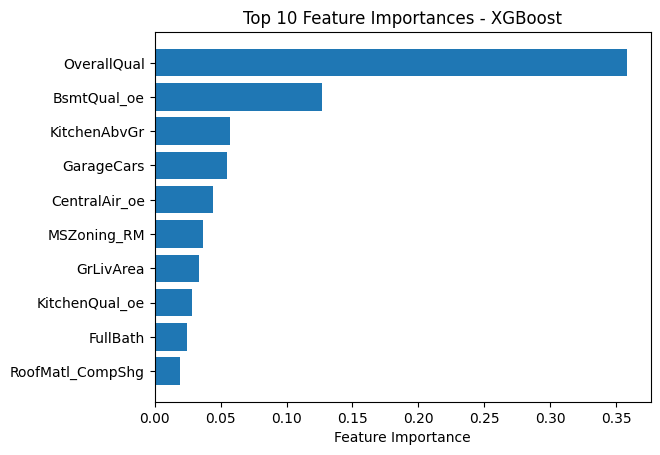

In [98]:
# Plot the feature_importances
feature_importances = xgb_model.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances)[-10:] # Select the top ten features

plt.figure()
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances - XGBoost')
plt.show()

#### 7.1.5 How does the XGB model perform on train data

In [99]:
# Predict fitted data
y_train_pred_xgb_pipeline = xgbr_pipeline.predict(X_train)
xgbr_pipeline_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb_pipeline))
print("XGBRegressor RMSE: ", round(xgbr_pipeline_rmse, 3))

XGBRegressor RMSE:  1698.206


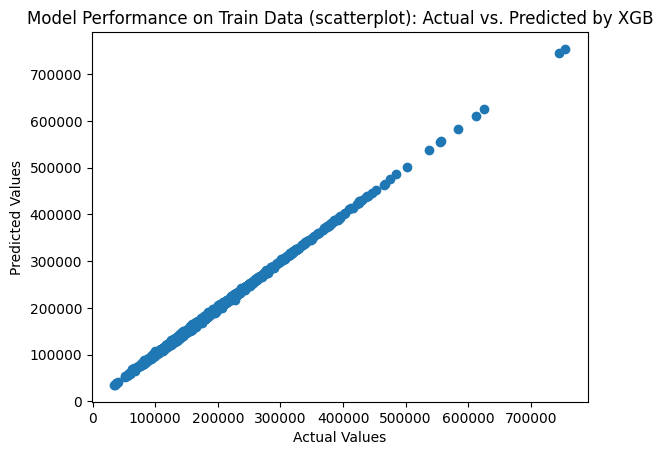

In [100]:
# Visualise the actual vs predicted values 
plt.scatter(y_train, y_train_pred_xgb_pipeline)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Performance on Train Data (scatterplot): Actual vs. Predicted by XGB')
plt.show()

Of course you'll peform well when you've seen the answer script. Let's test you on out-of-sample data.

<a id="section-seven-subsection-three"></a>
### 7.2 Test the XGB model on the test dataset

In [101]:
# Predict test data
y_pred = xgbr_pipeline.predict(test)

<a id="section-seven-subsection-four"></a>
### 7.3 Submit predictions for competition

In [102]:
# Save model predictions to a DataFrame
pred_df = pd.DataFrame(y_pred)

# Import the sample submission (We need the Id column)
sub_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [103]:
# Concat the predictions DataFrame with the Id column of the sample submission
datasets = pd.concat([sub_df['Id'], pred_df], axis=1)

In [104]:
# Rename the columns
datasets.columns = ['Id', 'SalePrice']

In [105]:
# Save the predictions to csv file, submission.csv
datasets.to_csv('/kaggle/working/submission.csv', index=False)

In [106]:
train.to_csv('/kaggle/working/train_set.csv', index=False)

In [107]:
test.to_csv('/kaggle/working/test_set.csv', index=False)

<a id="section-seven-subsection-five"></a>
### 7.4 Save the XGB model

In [108]:
import joblib

joblib.dump(xgbr_pipeline, 'xgbr_pipeline.pkl')

['xgbr_pipeline.pkl']